# Project 2
## Data exploration and preprocessing


### Importing libraries and data

In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('once')

In [2]:
# Reading the csv files.

df1= pd.read_csv('calendar.csv')
df2= pd.read_csv('listings_cleaned.csv')
pd.options.display.max_columns =100

### Preliminary data cleaning

In [3]:
# CLEANING RATES

df2['host_response_rate'] = df2['host_response_rate'].str.replace('%', '').astype(float)
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace('%', '').astype(float)

In [4]:
# FILLING NULL VALUES IN RATES WITH MEAN

df2['host_response_rate'].fillna(df2['host_response_rate'].mean(), inplace = True)
df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].mean(), inplace = True)

In [5]:
# CLEANING PRICE & BATHROOMS

df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)
df2['price'] = df2['price'].str.replace('$', '').str.replace(',', '').astype(float)


df2['bathrooms'] = [float(item.split()[0]) if isinstance(item, str) and item.split()[0].replace('.', '', 1).isdigit() else 0.5 if isinstance(item, str) else np.nan for item in df2['bathrooms_text']]

C:\Users\Mitsos\AppData\Local\Temp\ipykernel_22592\1837932030.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [6]:
# CLEANING AMENITIES

data = df2['amenities'].value_counts().index

data_clean = {}
clean_list = []
for l in data:

  l = l.split(', ')

  l_clean = [] 

  for element in l:

    element = element.replace('"', '').replace('[', '').replace(']', '')

    l_clean.append(element)
  clean_list.append(l_clean)
  for item in l_clean:

      if item in data_clean:

          data_clean[item] += 1

      else:

          data_clean[item] = 1

# remove NaN
clean_list = [lst for lst in clean_list if lst != ['']]

## QUESTIONS #1-22 

In [7]:
# QUESTION 1 How many samples and features does each file have?

print(df1.shape)
print('\n-------------\n')
print(df2.shape)

(1048575, 6)

-------------

(9455, 52)


In [8]:
# QUESTION 2 What are the types of your features?

feature_types1 = df1.dtypes

print(feature_types1)
print('\n--------------------------------------------------------\n')
feature_types2 = df2.dtypes

print(feature_types2)

listing_id          int64
date               object
available          object
price             float64
minimum_nights    float64
maximum_nights    float64
dtype: object

--------------------------------------------------------

id                                                int64
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                               object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                              

In [9]:
# QUESTION 3 Are there any missing values? If yes, how many and how many rows are
#affected?

missing_values1 = df1.isna().sum().sum()

missing_values_rows1 = df1[df1.isna().any(axis=1)].shape[0]

print("Total missing values:", missing_values1)
print("Number of rows with missing values:", missing_values_rows1)

print('\n-----------------------------------------\n')

missing_values2 = df2.isna().sum().sum()

missing_values_rows2 = df2[df2.isna().any(axis=1)].shape[0]

print("Total missing values:", missing_values2)
print("Number of rows with missing values:", missing_values_rows2)

Total missing values: 132
Number of rows with missing values: 66

-----------------------------------------

Total missing values: 31123
Number of rows with missing values: 5923


In [10]:
# Creating the merged table

merged_df = pd.merge(df1, df2, left_on='listing_id', right_on='id' )


# dropping overlapping columns
merged_df.drop('id', axis=1, inplace=True)
merged_df.drop('minimum_nights_y', axis=1, inplace=True)
merged_df.drop('maximum_nights_y', axis=1, inplace=True)
merged_df.drop('price_y', axis=1, inplace=True)

In [11]:
# QUESTION 4 How many listings per neighborhood are there?

listings_per_neighbourhood = merged_df.groupby('neighbourhood_cleansed')['listing_id'].count()

listings_per_neighbourhood

neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        8760
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                      1825
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     53431
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                        5840
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     9855
ΑΚΡΟΠΟΛΗ                             45992
ΑΜΠΕΛΟΚΗΠΟΙ                          40880
ΑΝΩ ΚΥΨΕΛΗ                            6205
ΑΝΩ ΠΑΤΗΣΙΑ                           6205
ΒΟΤΑΝΙΚΟΣ                            11681
ΓΚΑΖΙ                                13140
ΓΚΥΖΗ                                12410
ΓΟΥΒΑ                                 7301
ΓΟΥΔΙ                                11316
ΕΛΛΗΝΟΡΩΣΩΝ                           4380
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              160473
ΖΑΠΠΕΙΟ                              17521
ΘΗΣΕΙΟ                               31755
ΙΛΙΣΙΑ                               22996
ΚΕΡΑΜΕΙΚΟΣ                           33218
ΚΟΛΟΚΥΝΘΟΥ                             730
ΚΟΛΩΝΑΚΙ                             45633
ΚΟΛΩΝΟΣ                        

In [12]:
# QUESTION 5 How many listings per room type are there?

listings_per_room_type = merged_df.groupby('room_type')['listing_id'].count()

listings_per_room_type

room_type
Entire home/apt    946002
Hotel room           5842
Private room        94906
Shared room          1825
Name: listing_id, dtype: int64

In [13]:
# QUESTION 6 How many listings per room number are there?

listings_per_room_number = merged_df.groupby('bedrooms')['listing_id'].count()

listings_per_room_number

bedrooms
1.0    572946
2.0    303701
3.0     72272
4.0     15697
5.0      5476
6.0      2921
Name: listing_id, dtype: int64

The most listings that a single host has are :  15695


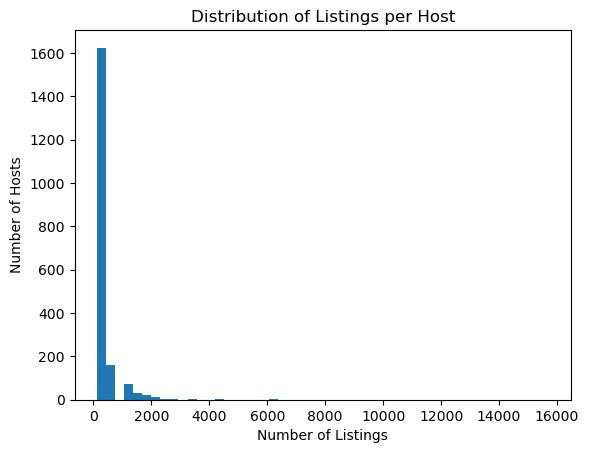

In [14]:
# QUESTION 7 What is the distribution of listings per host? What are the most listings that a
#single host has?

listings_per_host = merged_df.groupby('host_id')['listing_id'].count()
print('The most listings that a single host has are : ' , listings_per_host.max())
plt.hist(listings_per_host, bins=50)  
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts')
plt.title('Distribution of Listings per Host')
plt.show()

In [15]:
# QUESTION 8 When was the first host registered?

first_host = merged_df['host_since'].sort_values().iloc[0]

print('The first host was registered: ', first_host)

The first host was registered:  2009-09-08


In [16]:
# QUESTION 9 What year had the most hosts registered?
years = pd.to_datetime(merged_df['host_since']).dt.year
hosts_per_year = merged_df.groupby(years)['host_id'].count()

most_host_registered = hosts_per_year.sort_values(ascending=False).head(1)
year = int(most_host_registered.index[0])
new_hosts = most_host_registered.values[0]

print('The year that had the most hosts registered was the year: ', year, 'with : ', new_hosts , ' new hosts')


The year that had the most hosts registered was the year:  2016 with :  263910  new hosts


In [17]:
# QUESTION 10 What is the range of the calendar, i.e. when does it start and when does it end?

max_date = pd.to_datetime(merged_df['date']).max()

min_date = pd.to_datetime(merged_df['date']).min()

date_range = max_date - min_date

days = date_range.days

print('The starting day is: ',min_date.date(), 'The ending day is: ',max_date.date(),  'and the date range is :', days ,' days')

The starting day is:  2020-10-25 The ending day is:  2021-10-25 and the date range is : 365  days


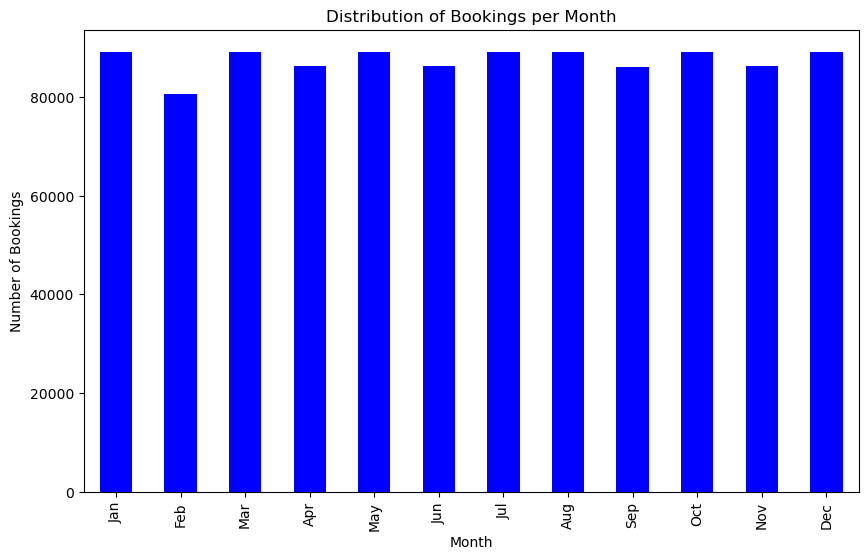

Time Periods with the Highest Percentage of Bookings over Listings:
month
10    3100.139179
dtype: float64


In [18]:
# QUESTION 11 What is the distribution of bookings per month? Can you identify the time periods with 
#the highest percentage of bookings over listings

df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date'].dt.month
bookings_per_month = df1.groupby('month').size()
percentage_bookings_per_month = bookings_per_month / df1['listing_id'].nunique() * 100


plt.figure(figsize=(10, 6))
bookings_per_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Bookings per Month')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), months)
plt.show()


# Identify the time periods with the highest percentage of bookings over listings
time_periods_highest_bookings = percentage_bookings_per_month[percentage_bookings_per_month == percentage_bookings_per_month.max()]

# Print the identified time periods
print("Time Periods with the Highest Percentage of Bookings over Listings:")
print(time_periods_highest_bookings)

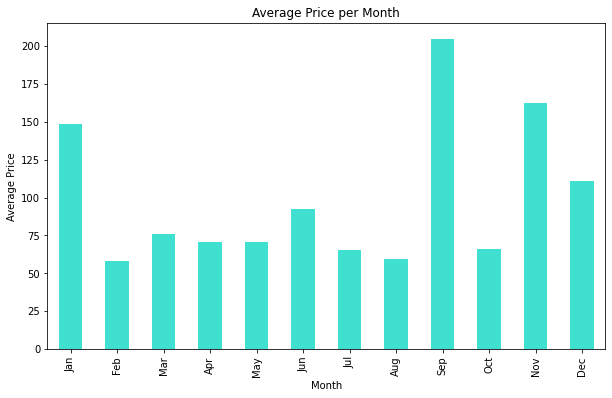

Time Periods with the Highest Prices:
host_since
9.0    204.848157
Name: price_x, dtype: float64


In [24]:
# QUESTION 12 Which time periods are the prices higher?

# Convert the host_since column to datetime format
merged_df['host_since'] = pd.to_datetime(merged_df['host_since'])

# Group the data by month and calculate the average price for each month
average_price_per_month_X = merged_df.groupby(merged_df['host_since'].dt.month)['price_x'].mean()

# Plot the average price per month
plt.figure(figsize=(10, 6))
average_price_per_month_X.plot(kind='bar', color='turquoise')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price per Month')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), months)
plt.show()


# Identify the time periods with the highest prices
time_periods_highest_prices = average_price_per_month_X[average_price_per_month_X == average_price_per_month_X.max()]

# Print the identified time periods
print("Time Periods with the Highest Prices:")
print(time_periods_highest_prices)




In [19]:
# QUESTION 13 How many identified hosts are there? What is their percentage over all hosts?

# Calculation of the number of identified hosts
identified_hosts_count = merged_df['host_identity_verified'].value_counts().loc['t']

# Calculation of the total number of hosts
total_hosts_count = merged_df['host_identity_verified'].value_counts().sum()

# Calculation of the percentage of identified hosts over all hosts
identified_hosts_percentage = (identified_hosts_count / total_hosts_count) * 100

print("Number of Identified Hosts:", identified_hosts_count)
print("Percentage of Identified Hosts over All Hosts: {:.2f}%".format(identified_hosts_percentage))

Number of Identified Hosts: 702307
Percentage of Identified Hosts over All Hosts: 67.02%


In [20]:
# QUESTION 14 What are the top-10 most common amenities provided by the hosts?

amenities_clean = dict(sorted(data_clean.items(), key=lambda x: x[1], reverse=True))
dict(list(amenities_clean.items())[:5])

{'Wifi': 8258,
 'Essentials': 8170,
 'Air conditioning': 8061,
 'Kitchen': 7856,
 'Hair dryer': 7839}

In [21]:
# QUESTION 15 Can you identify the top-10 rated listings? Are they by the same host?

ids = merged_df.groupby(['listing_id', 'host_name'])['review_scores_rating'].agg(['mean']).sort_values(by='mean',ascending=False)
filtered_df = merged_df[merged_df['review_scores_rating'] == 100.0]
ids_filtered = filtered_df.groupby(['listing_id', 'host_name'])['reviews_per_month'].agg(['mean']).sort_values(by='mean', ascending=False)

print(ids.head(412))

print('\nAs we found that 410 hosts have excellent mean rating score (100%), \nwe decided to keep the top 10 with excellent rating score that have the most reviews per month as well.\nThey are not by the same host.\n',ids_filtered.head(10))


                              mean
listing_id host_name              
17021343   Bill & John       100.0
18335441   Lampros           100.0
6576594    Manos             100.0
13825644   Stelios           100.0
13835153   Lydia             100.0
...                            ...
19047757   1915 Team         100.0
18923001   Lampros + Lilian  100.0
21122597   Catherine         100.0
13341087   Stamatis           99.0
17784390   Maria              99.0

[412 rows x 1 columns]

As we found that 410 hosts have excellent mean rating score (100%), 
we decided to keep the top 10 with excellent rating score that have the most reviews per month as well.
They are not by the same host.
                              mean
listing_id host_name             
15841192   Vassilios         8.22
19901354   Annie & Vasiliki  5.22
19168186   Charis            5.08
16037846   Kleio             5.08
11614090   Panos             5.05
20858946   Evanthia          4.98
17455901   Ma Maison         4.72
13502189 

In [22]:
# QUESTION 16 Can you identify the top-5 rated locations/neighborhoods?

neighborhood_ratings = merged_df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()

sorted_neighborhoods = neighborhood_ratings.sort_values(ascending=False)

top_5_neighborhoods = sorted_neighborhoods.head(5)

print("Top-5 Rated Neighborhoods:\n")
print(top_5_neighborhoods)

Top-5 Rated Neighborhoods:

neighbourhood_cleansed
ΕΛΛΗΝΟΡΩΣΩΝ    98.857143
ΓΚΥΖΗ          97.724138
ΓΚΑΖΙ          97.379310
ΡΗΓΙΛΛΗΣ       97.142857
ΡΙΖΟΥΠΟΛΗ      97.000000
Name: review_scores_rating, dtype: float64


In [23]:
# QUESTION 17 Can you identify the time periods when most reviews are submitted?

merged_df['last_review'] = pd.to_datetime(merged_df['last_review'])

merged_df['year_month'] = merged_df['last_review'].dt.to_period('M')

reviews_count = merged_df['year_month'].value_counts()

sorted_periods = reviews_count.sort_values(ascending=False)

top_periods = sorted_periods.head()

print("Time Periods with the Most Reviews:")
print(top_periods)

Time Periods with the Most Reviews:
2020-10    198210
2020-09    121689
2020-08     61913
2020-03     54391
2019-10     46722
Freq: M, Name: year_month, dtype: int64


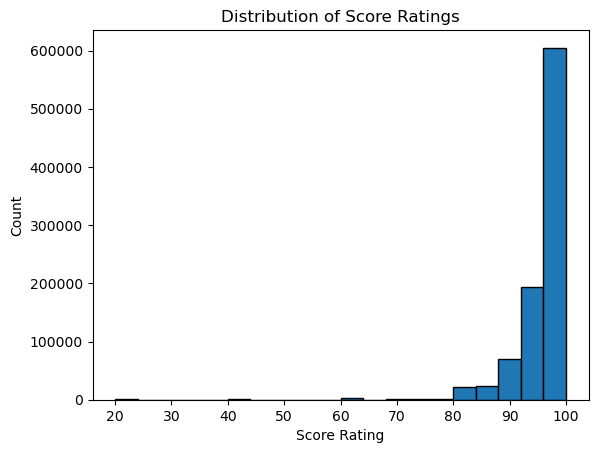

Number of reviews scoring less than 50: 2190
Percentage of reviews scoring less than 50: 0.24%


In [24]:
# QUESTION 18 What is the distribution of score ratings? Are there lots of reviews scoring < 50?

filtered_df = merged_df.dropna(subset=['review_scores_rating'])

# Plot the distribution of score ratings
plt.hist(filtered_df['review_scores_rating'], bins=20, edgecolor='black')
plt.xlabel('Score Rating')
plt.ylabel('Count')
plt.title('Distribution of Score Ratings')
plt.show()

# Count the number of reviews scoring less than 50
low_ratings_count = (filtered_df['review_scores_rating'] < 50).sum()

# Calculate the percentage of reviews scoring less than 50
percentage_low_ratings = (low_ratings_count / len(filtered_df)) * 100

# Print the results
print("Number of reviews scoring less than 50:", low_ratings_count)
print("Percentage of reviews scoring less than 50: {:.2f}%".format(percentage_low_ratings))

<Axes: xlabel='room_type', ylabel='price_x'>

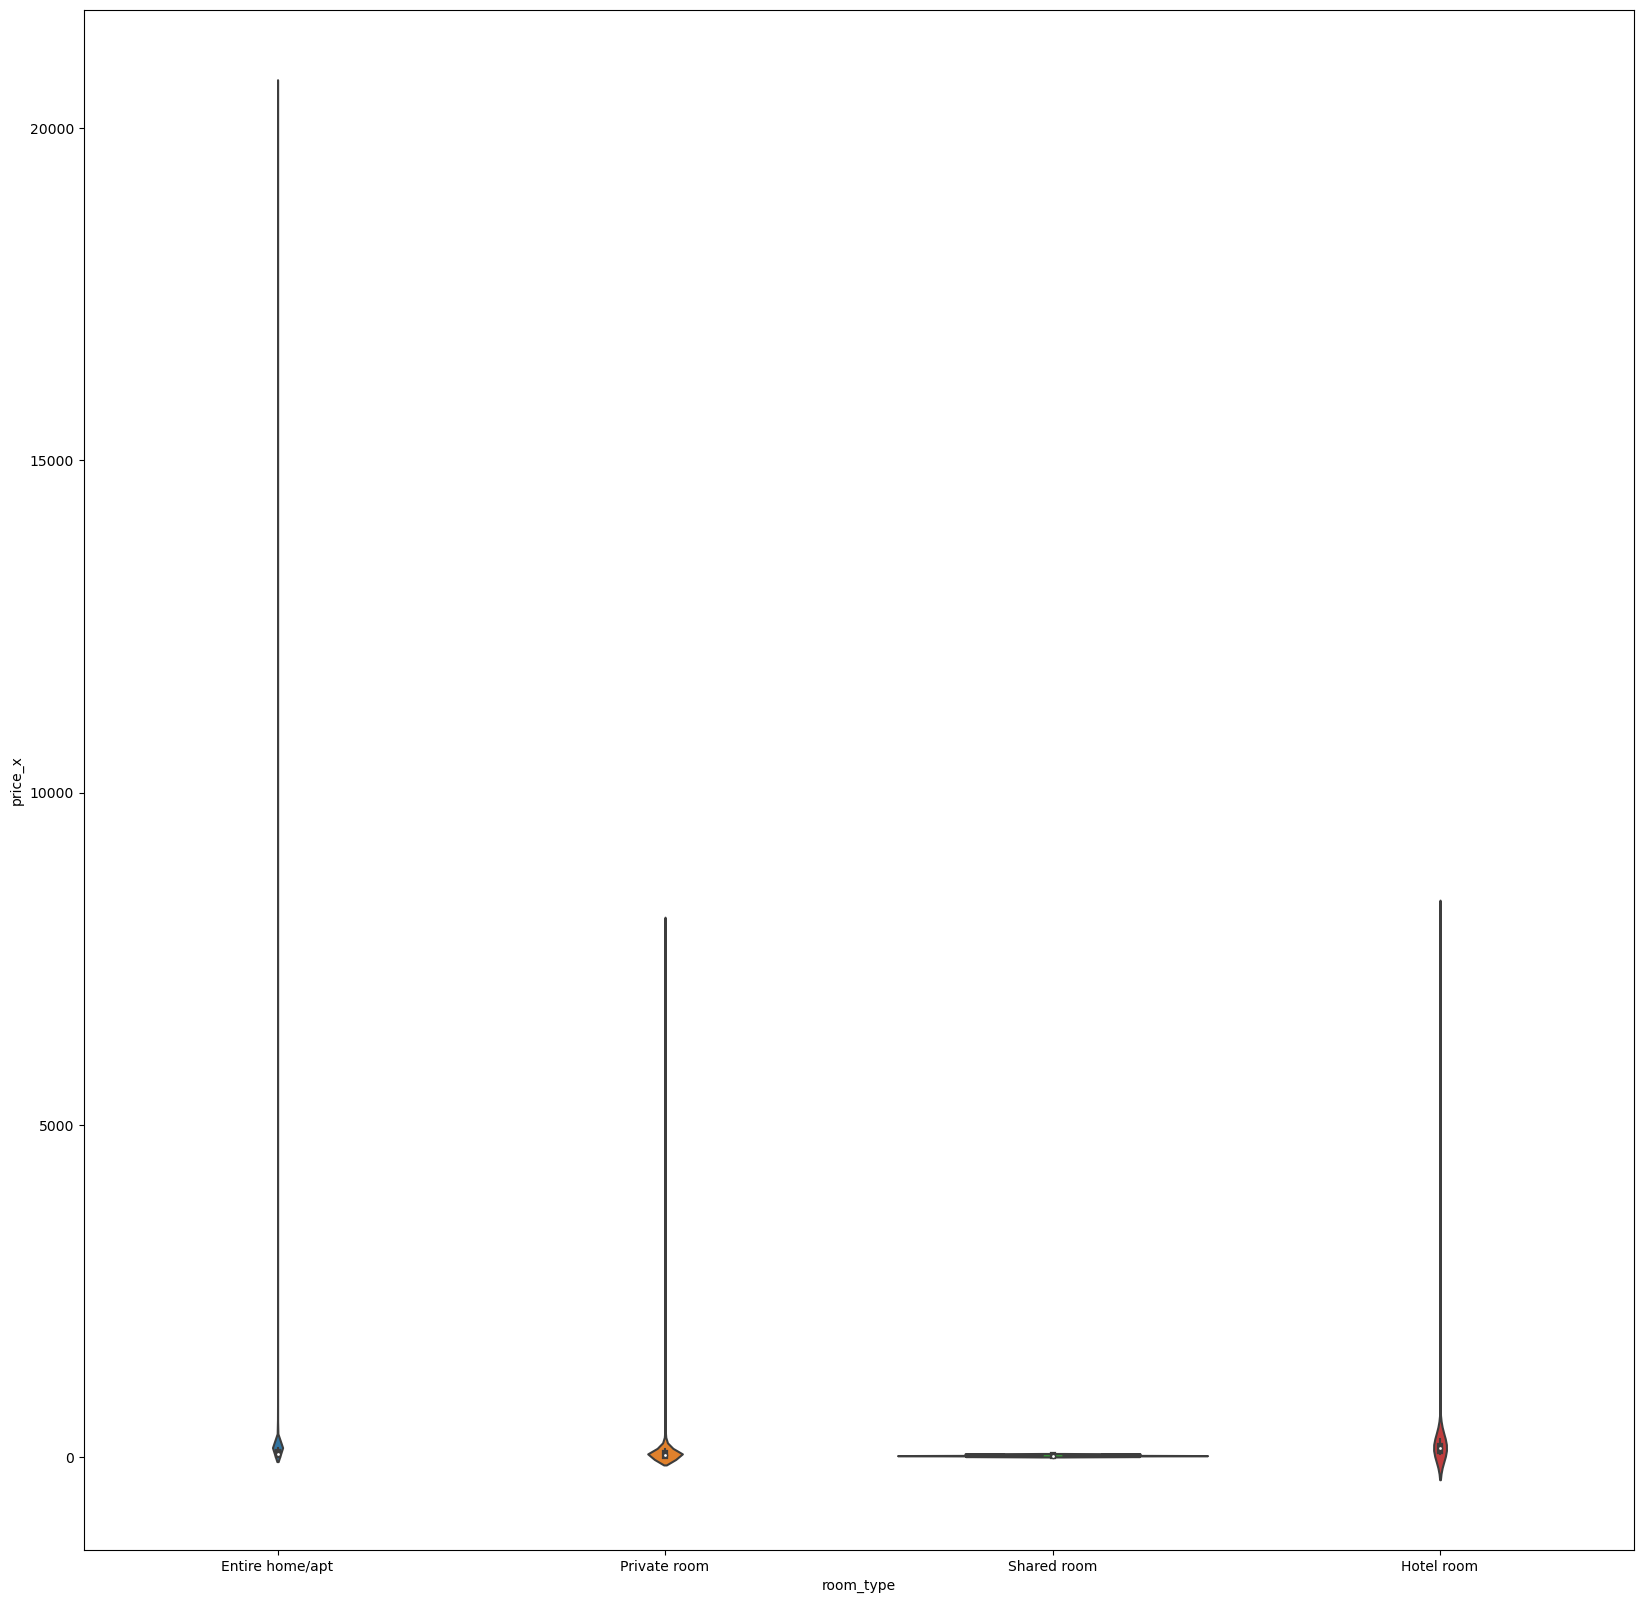

In [25]:
# QUESTION 19 What is the distribution of price for each room type?


plt.figure(figsize=(20, 20))
sns.violinplot(x='room_type', y='price_x', data=merged_df, split=True)

<Axes: xlabel='room_type', ylabel='price_x'>

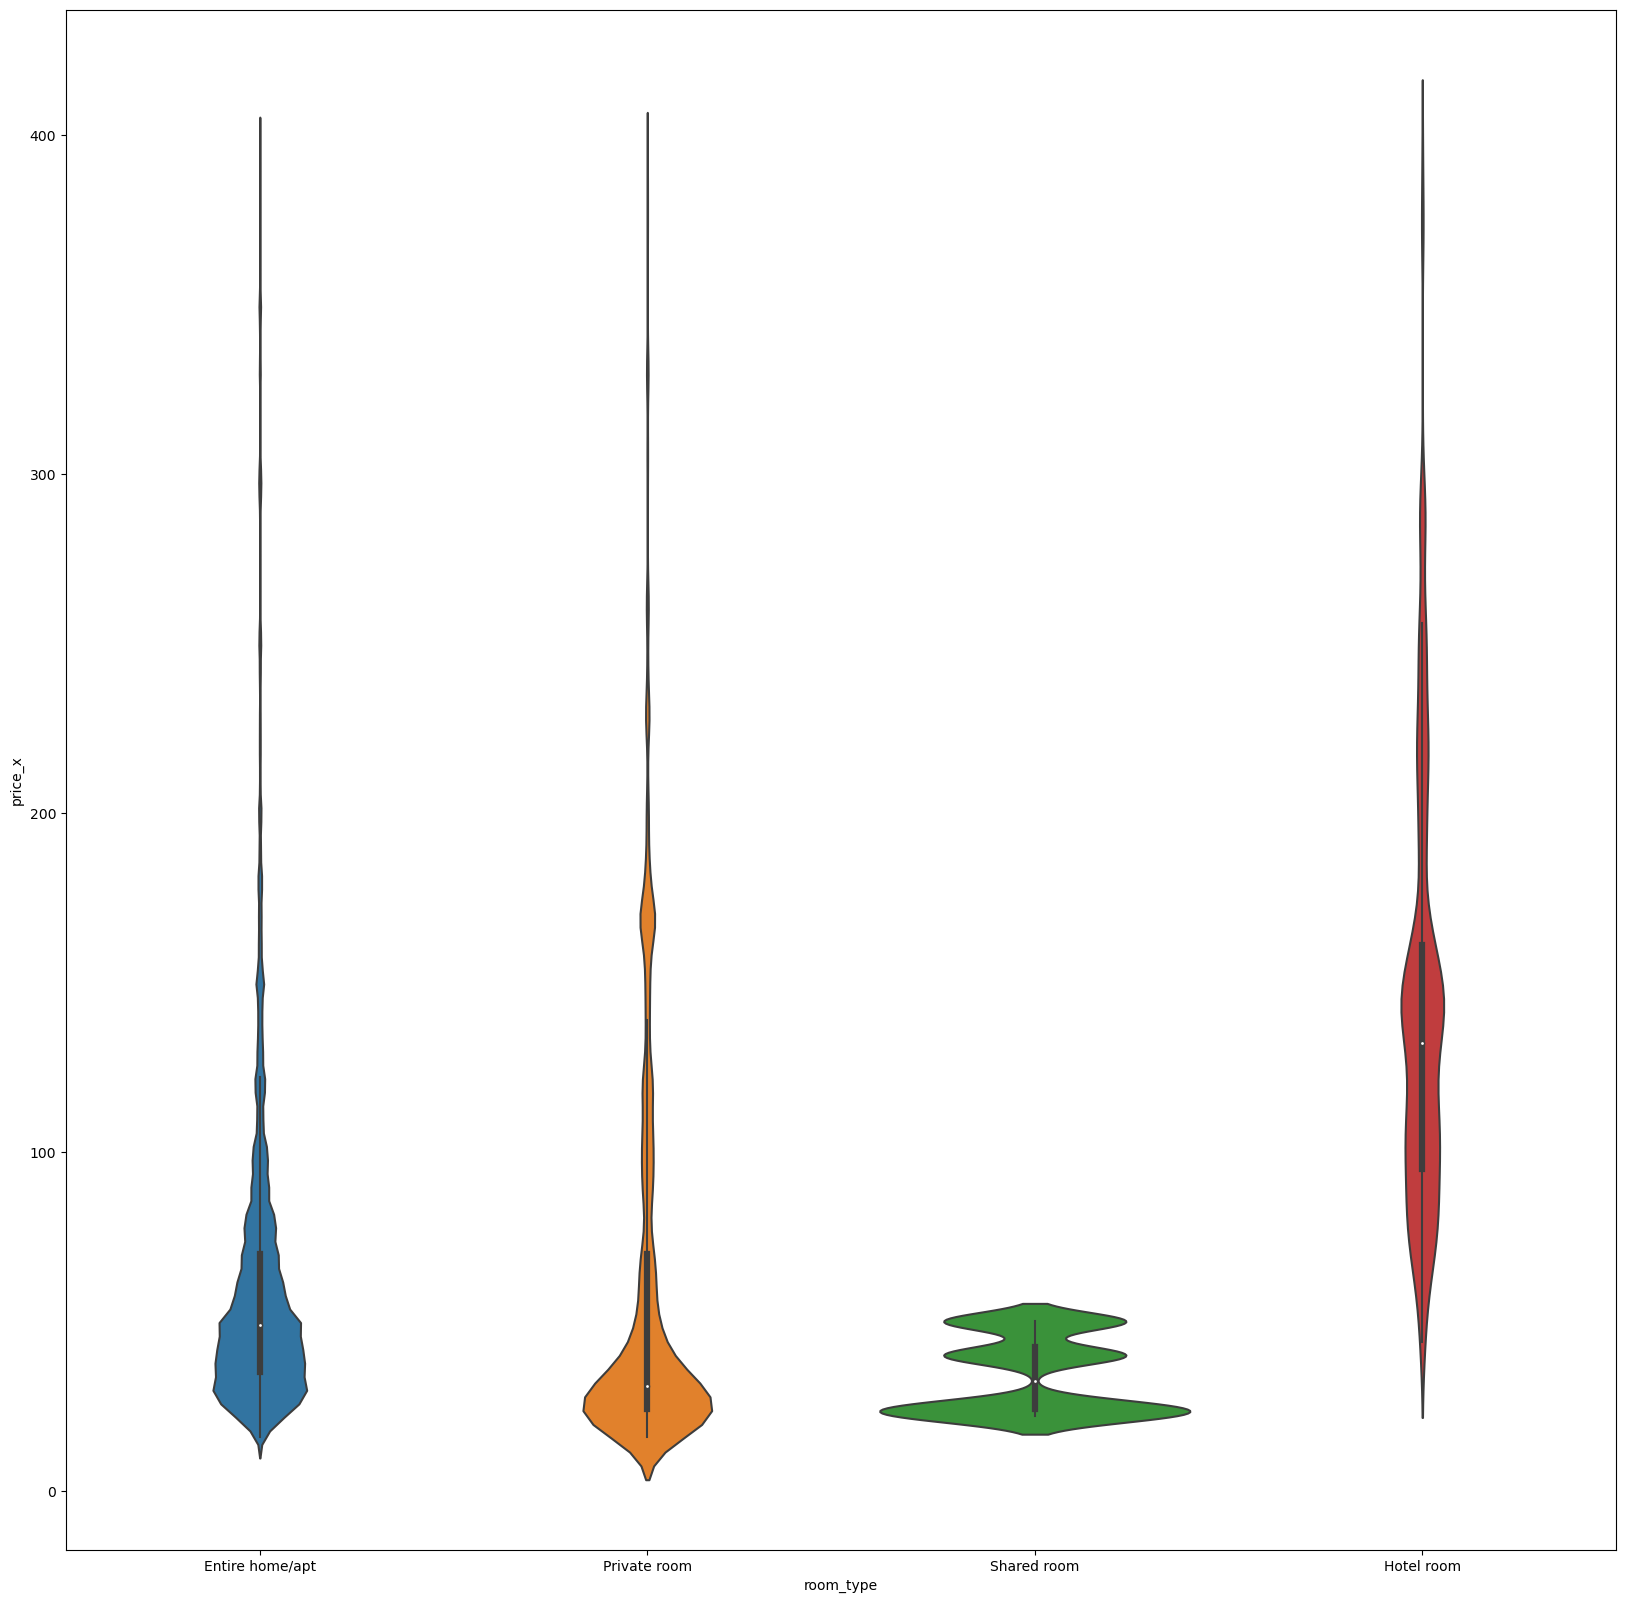

In [26]:
# QUESTION 19 What is the distribution of price for each room type?
# excluding outliers based on percentiles

q_low = merged_df["price_x"].quantile(0.01)
q_hi  = merged_df["price_x"].quantile(0.99)

df_filtered = merged_df[(merged_df["price_x"] < q_hi) & (merged_df["price_x"] > q_low)]
#Create a violinplot for distributions
plt.figure(figsize=(20, 20))
sns.violinplot(x='room_type', y='price_x', data=df_filtered, split=True)

In [27]:
# QUESTION 20 Can you identify which days of the week have the highest mean prices?

# Convert 'date' to day of the week
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Calculate mean prices & sort them
mean_prices = merged_df.groupby('day_of_week')['price_x'].mean()
mean_prices_sorted = mean_prices.sort_values(ascending=False)

print(mean_prices_sorted)

day_of_week
Saturday     99.359607
Sunday       99.064087
Friday       99.061182
Thursday     98.847043
Monday       98.585014
Tuesday      98.506366
Wednesday    98.467990
Name: price_x, dtype: float64


In [28]:
# QUESTION 21 The feature “amenities” in listings_cleaned.csv does not seem to be in an
#appropriate form for analysis. Can you find a way to represent it in numerical form?
# First way
# Create a set of all unique amenities
all_amenities = set()
for amenities in clean_list:
    all_amenities.update(amenities)

# Initialize a new list to store the encoded amenities
encoded_amenities = []

# Iterate over each row and encode amenities
for amenities in clean_list:
    row_amenities = []
    for amenity in all_amenities:
        if amenity in amenities:
            row_amenities.append(1)
        else:
            row_amenities.append(0)
    encoded_amenities.append(row_amenities)

for onehot in encoded_amenities:
    print(onehot)
    break

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [29]:
# QUESTION 21 The feature “amenities” in listings_cleaned.csv does not seem to be in an
#appropriate form for analysis. Can you find a way to represent it in numerical form?
# Second way
#scikit-learn's MultiLabelBinarizer will transform a list into a matrix, 
#making each unique element in an iterable or iterable of iterables a seperate column / feature

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

gmlb = mlb.fit_transform(clean_list)

print(mlb.classes_)

# 256 features/different amenities
am = pd.DataFrame(gmlb, columns=mlb.classes_)
print(am)

['2 hotplates electric stove' '22\\ HDTV' '24\\ HDTV with Netflix'
 '32\\ HDTV' '32\\ HDTV with Netflix' '32\\ TV' '38\\ HDTV with Netflix'
 '40\\ HDTV' '40\\ HDTV with Netflix' '42\\ HDTV with Netflix'
 '42\\ TV with Netflix' '43\\ HDTV' '43\\ HDTV with Netflix'
 '43\\ TV with standard cable' '48\\ HDTV with Netflix' '50\\ HDTV'
 '50\\ HDTV with Netflix' '55\\ HDTV' '55\\ HDTV with Netflix' '65\\ TV'
 '93l refrigerator' 'Air conditioning' 'Amazon Prime Video'
 'Aqua Senses body soap' 'Aqua Senses shampoo' 'Aqua senses shampoo'
 'Arieli electric stove' 'Arieli refrigerator' 'Arielli ARS-121LN'
 'BBQ grill' 'Baby bath' 'Baby monitor' 'Babysitter recommendations'
 'Baking sheet' 'Barbecue utensils' 'Bathroom essentials' 'Bathtub'
 'Beach essentials' 'Beachfront' 'Bed linens' 'Bedroom comforts'
 'Bluetooth sound system' 'Body soap' 'Bosch induction stove' 'Bosch oven'
 'Bosch refrigerator' 'Bosch stainless steel induction stove'
 'Bosch stainless steel oven' 'Bread maker' 'Breakfast' 'Bui

In [30]:
#QUESTION 22 What is the scale of your numeric features? Are they similar?

numeric_features = merged_df.select_dtypes(include='number')

# Exclude unimportant columns
# numeric_features.drop(, inplace=True)

# Calculate the range of each numeric feature
range_per_feature = numeric_features.max() - numeric_features.min()

# Calculate the mean of each numeric feature
mean_per_feature = numeric_features.mean()

# Calculate the standard deviation of each numeric feature
std_per_feature = numeric_features.std()

# Create a DataFrame to compare the statistics
statistics_df = pd.DataFrame({
    'Range': range_per_feature,
    'Mean': mean_per_feature,
    'Standard Deviation': std_per_feature
})

print(statistics_df)

                                                     Range          Mean  \
listing_id                                    2.377757e+07  1.448952e+07   
price_x                                       2.064400e+04  9.884203e+01   
minimum_nights_x                              4.430000e+02  3.098936e+00   
maximum_nights_x                              9.999000e+03  8.762893e+02   
host_id                                       2.981365e+08  6.102178e+07   
host_response_rate                            1.000000e+02  9.341928e+01   
host_acceptance_rate                          1.000000e+02  9.318517e+01   
host_listings_count                           7.480000e+02  1.458224e+01   
host_total_listings_count                     7.480000e+02  1.458224e+01   
latitude                                      3.795705e+04  2.890165e+02   
longitude                                     2.374230e+04  2.713468e+02   
accommodates                                  1.500000e+01  3.971279e+00   
bathrooms   

### The 'listing_id' and 'host_id' columns have a much larger range of values than the rest, but their numerical values are insignifant for our analysis, as they pertain only to id numbers, so these may be dropped. The 'latitude' and 'longitude' values have a large range as well, but may be useful in our analysis, so these may be scaled. 'Price_x' is similarly large in range, but it is highly affected by outliers, so these may be excluded if necessary.

## Further analysis

C:\Users\Mitsos\AppData\Local\Temp\ipykernel_22592\2887789347.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column], kde=False)


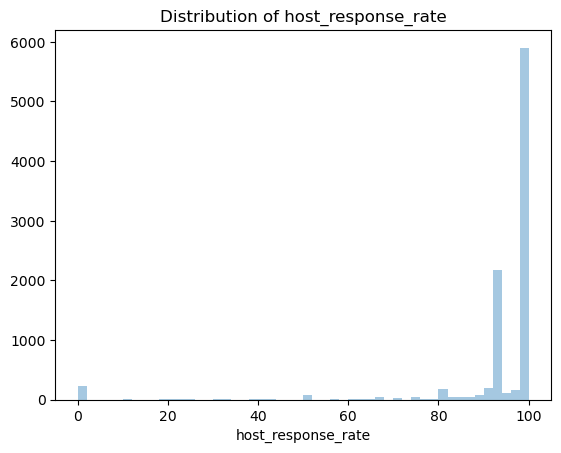

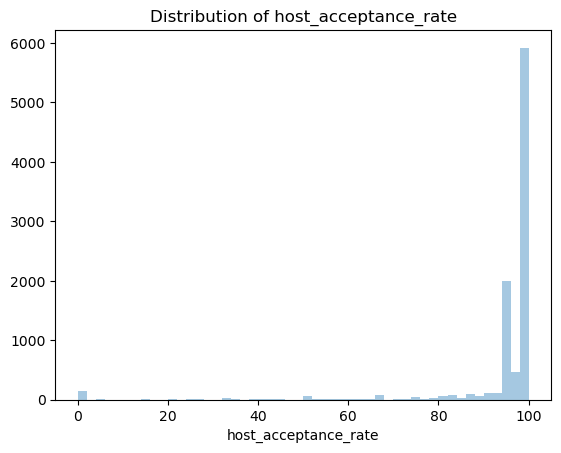

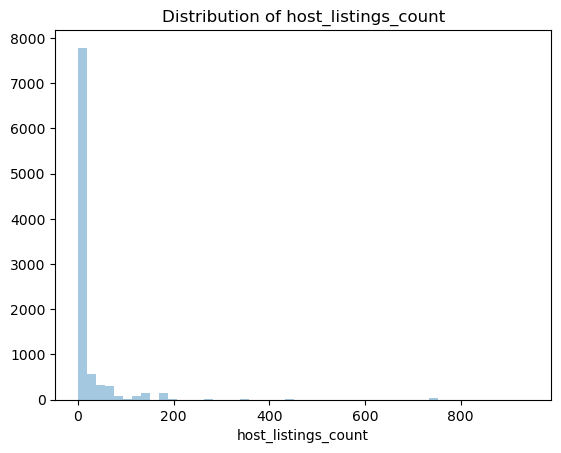

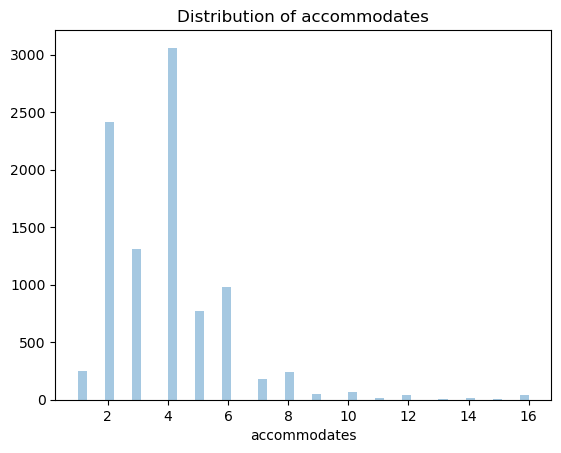

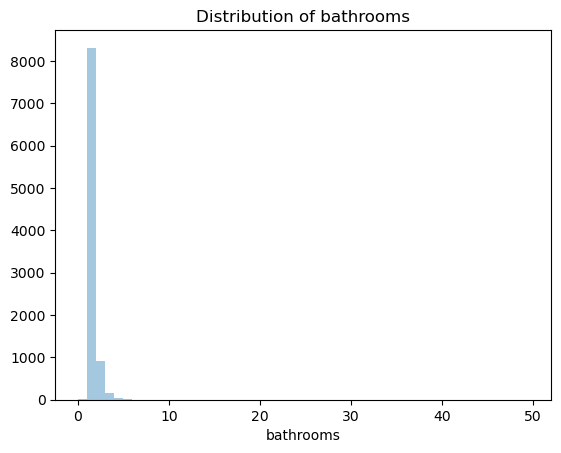

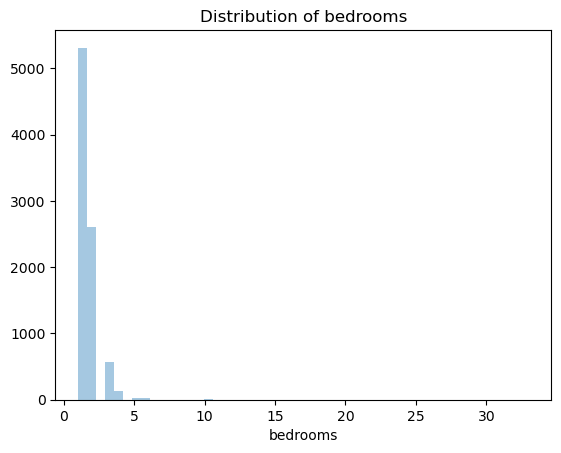

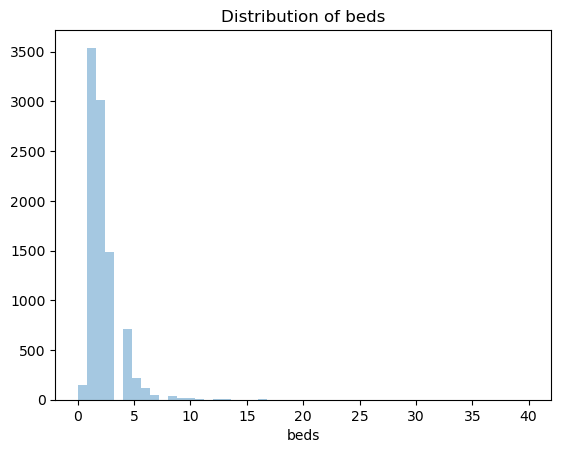

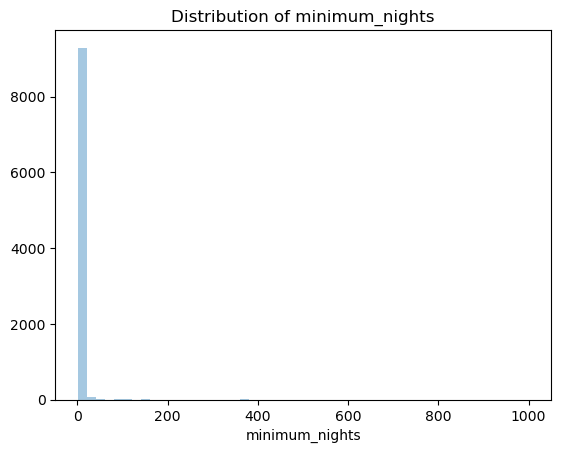

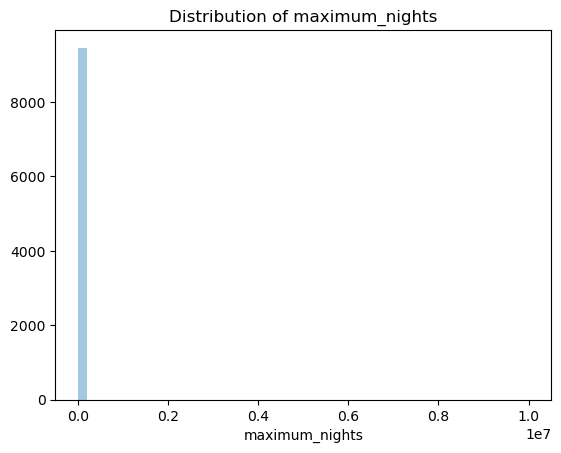

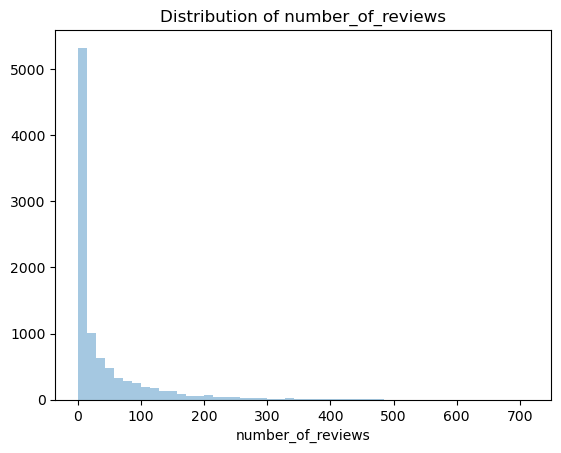

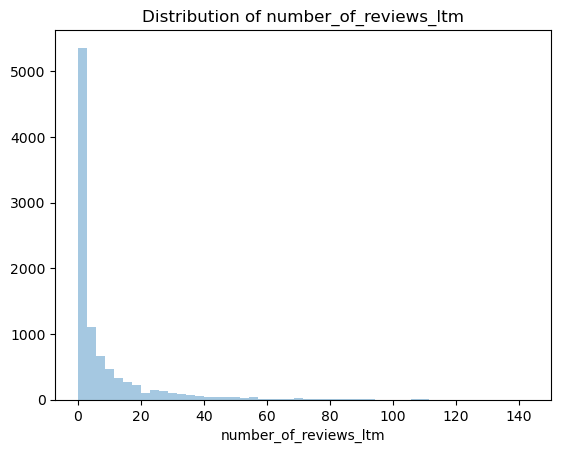

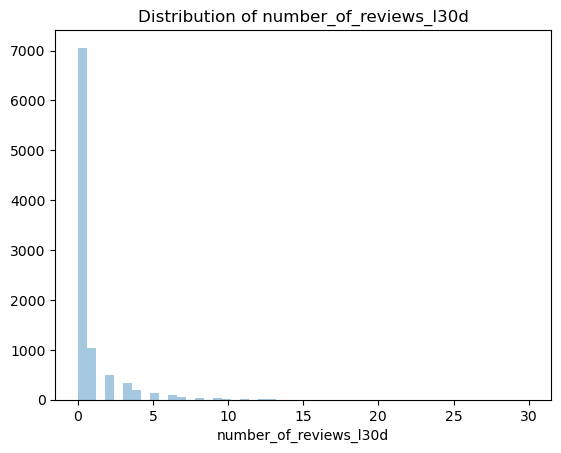

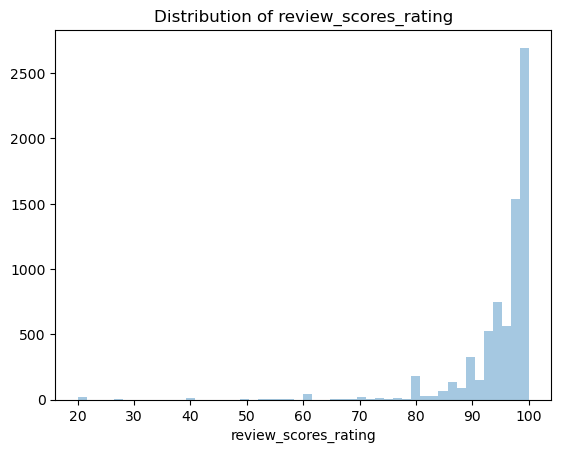

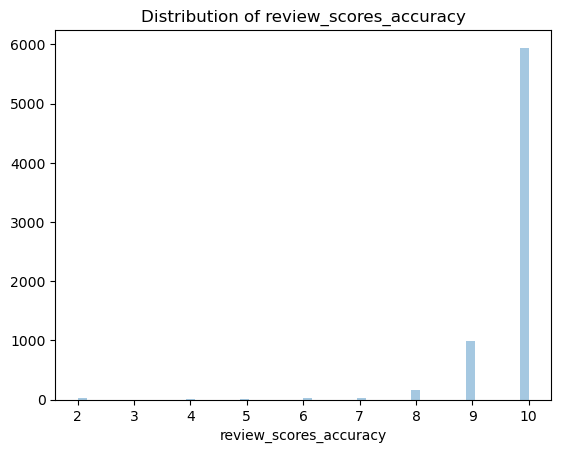

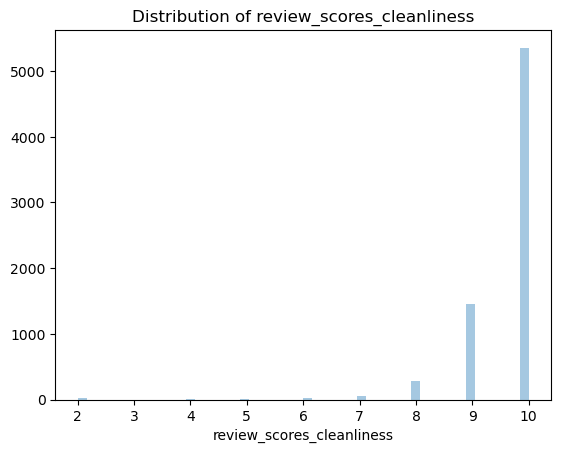

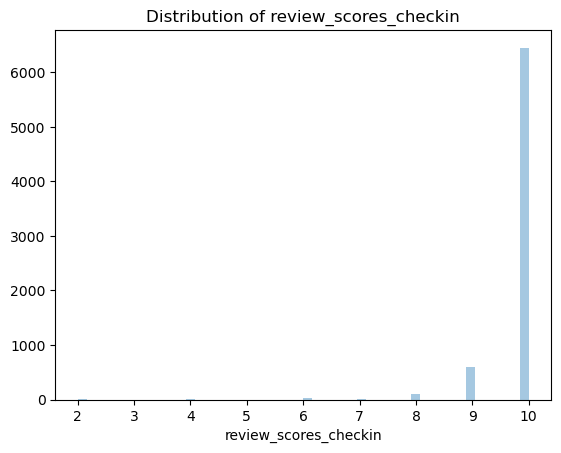

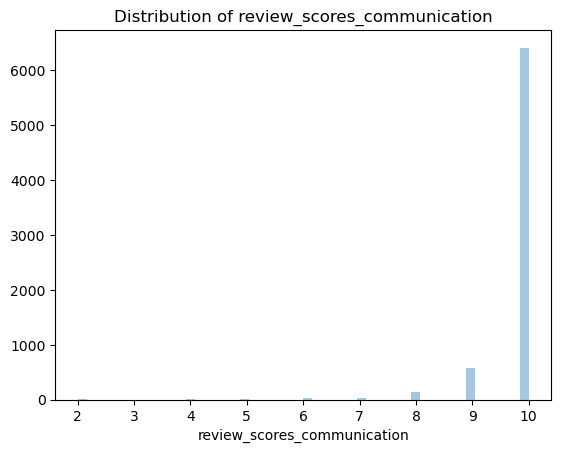

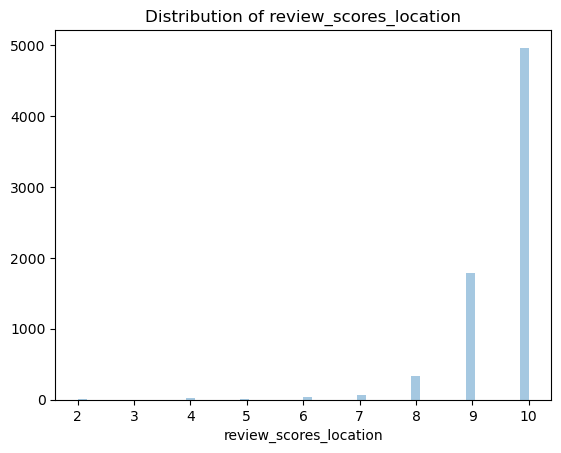

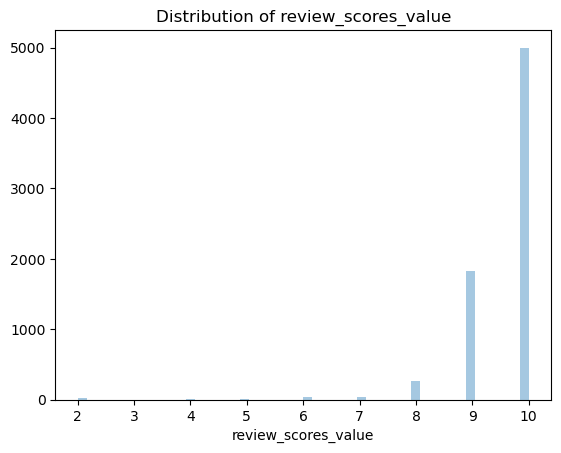

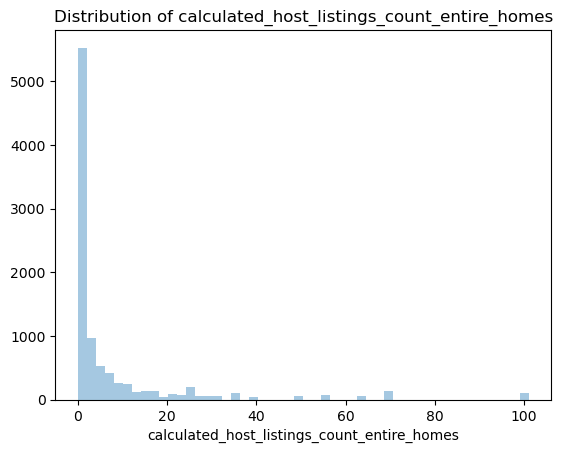

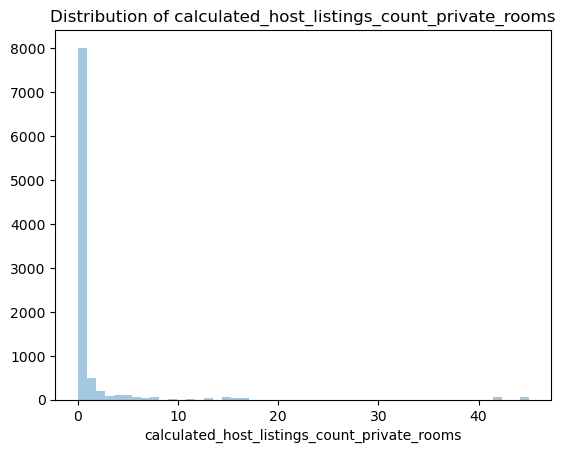

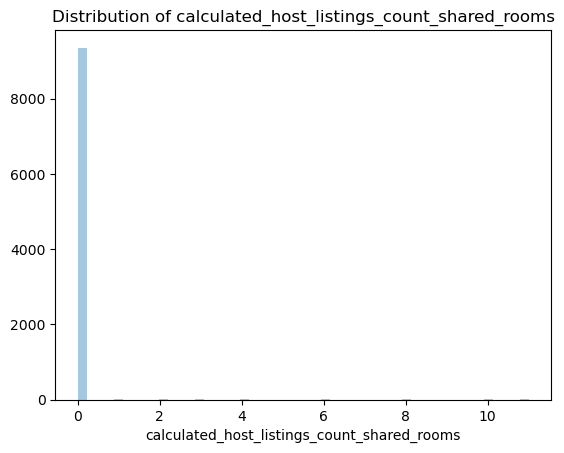

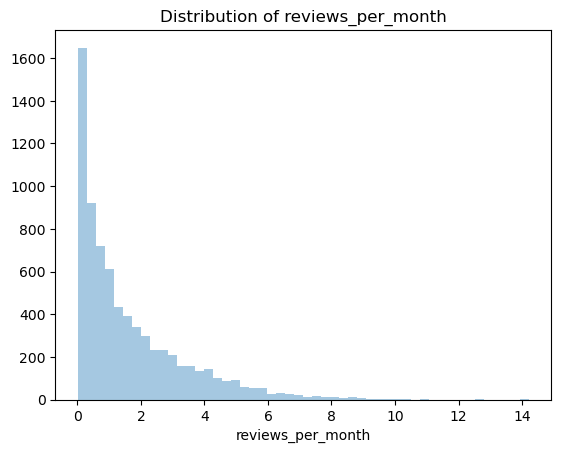

In [31]:
#Further analysis

#distribution of continuous features, outliers

selected_continuous_columns= ['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','bedrooms','beds','minimum_nights',
                              'maximum_nights', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d',
                              'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
                              'review_scores_checkin', 'review_scores_communication','review_scores_location',
                              'review_scores_value', 'calculated_host_listings_count_entire_homes',
                              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                              'reviews_per_month' ]

df_continuous= df2[selected_continuous_columns]


for column in df_continuous:
    sns.distplot(df2[column], kde=False)
    plt.title(f'Distribution of {column}')
    plt.show()
    




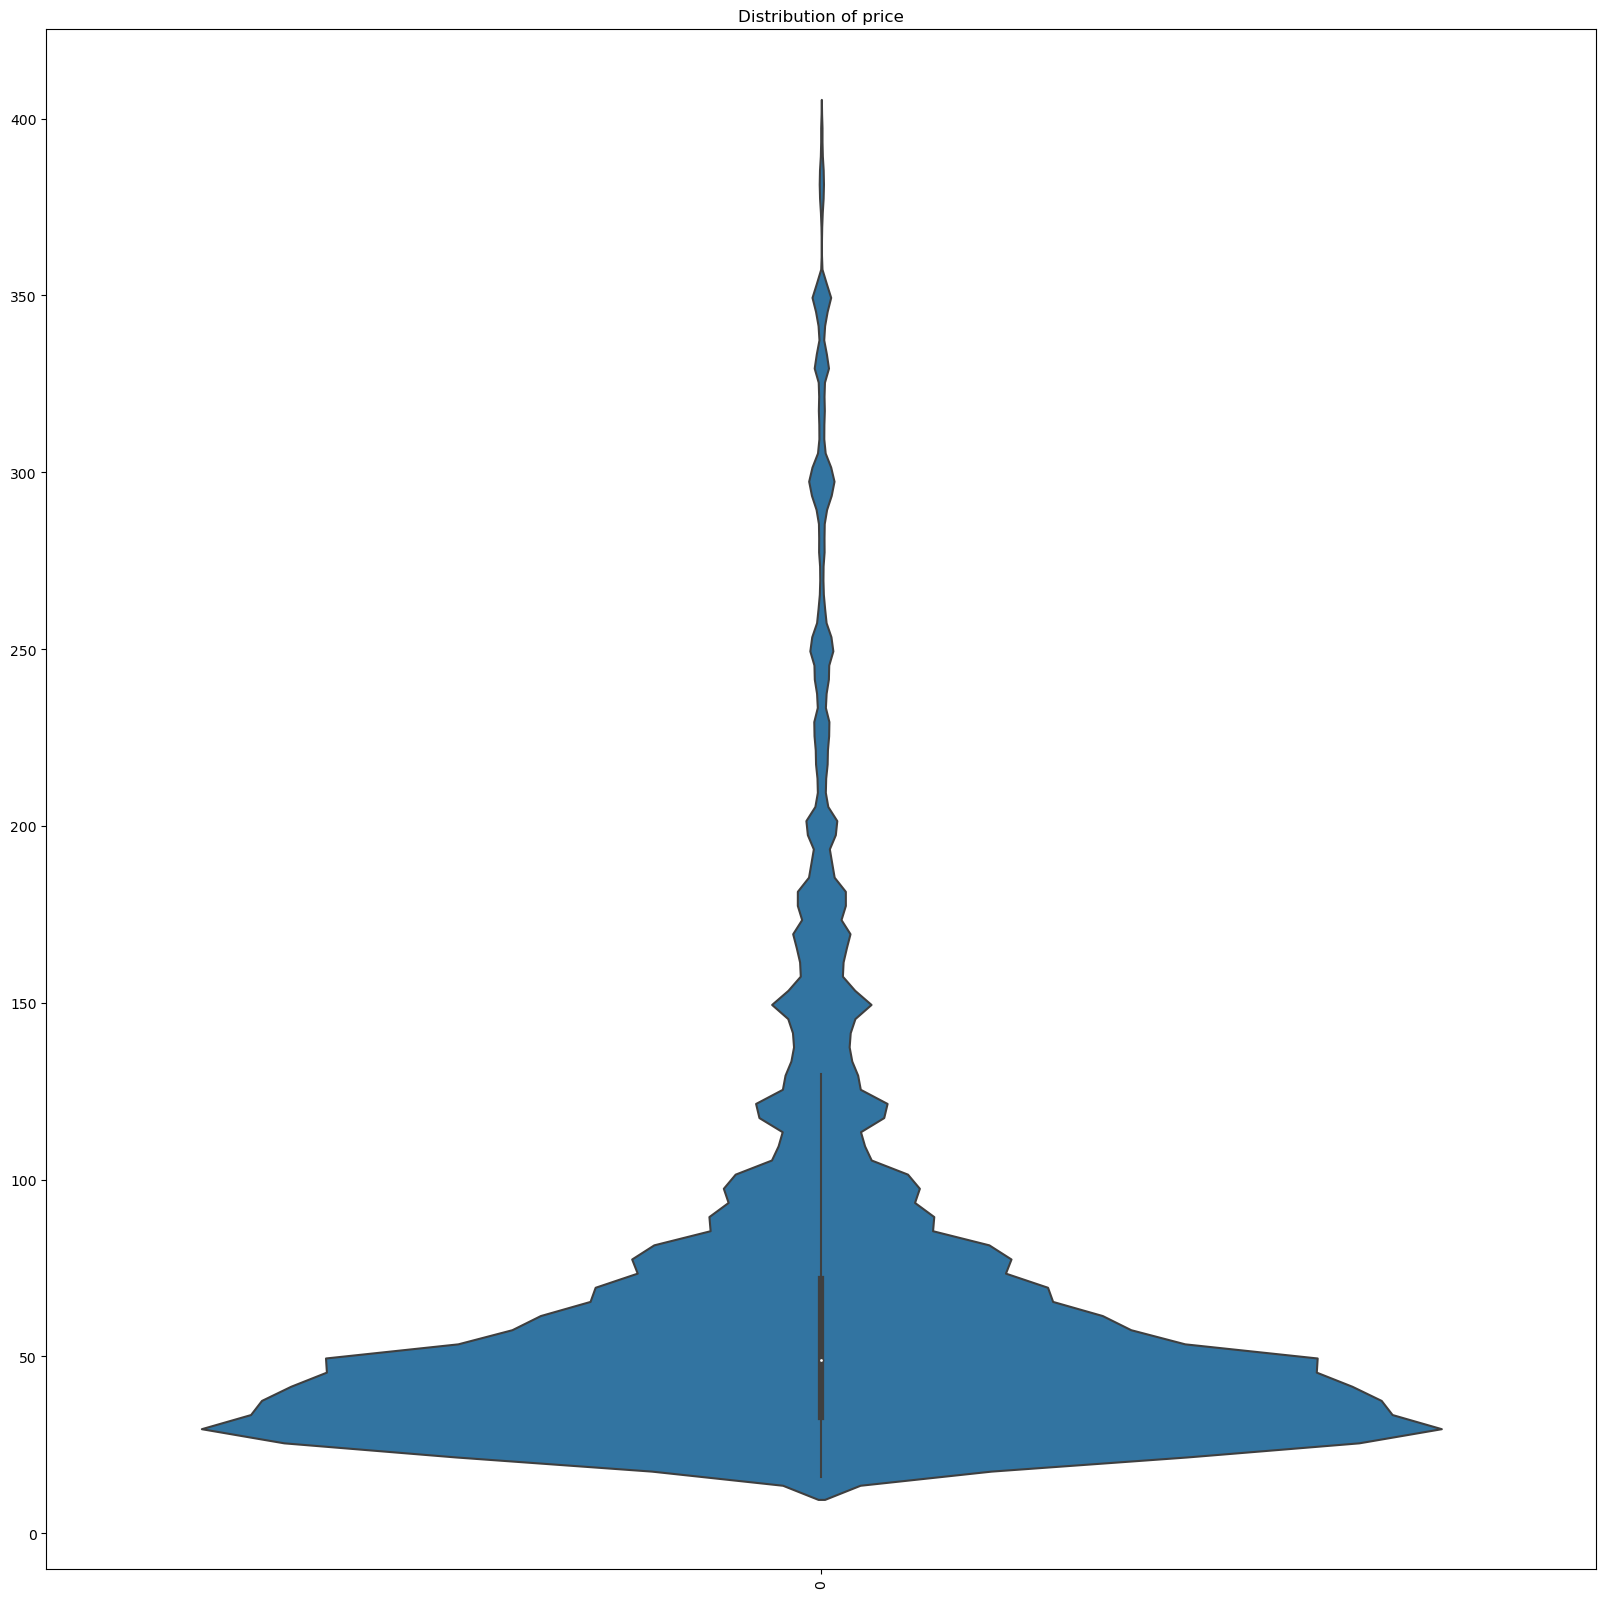

In [32]:
#distribution of price excluding outliers
q_low = merged_df["price_x"].quantile(0.01)
q_hi  = merged_df["price_x"].quantile(0.99)

df_filtered = merged_df[(merged_df["price_x"] < q_hi) & (merged_df["price_x"] > q_low)]

plt.figure(figsize=(20, 20))
sns.violinplot(df_filtered['price_x'])
plt.title(f'Distribution of price')
plt.xticks(rotation=90)
plt.show()

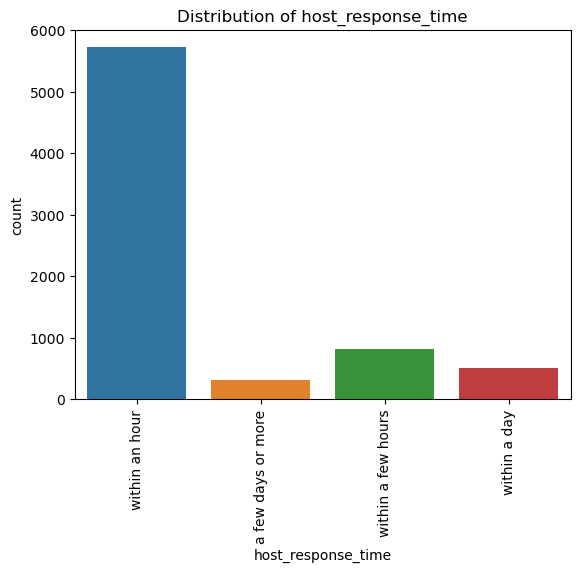

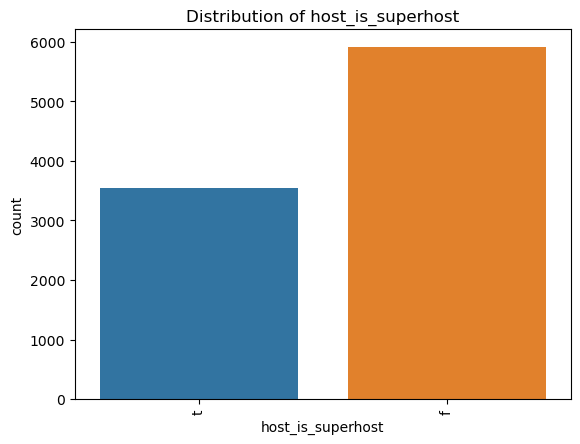

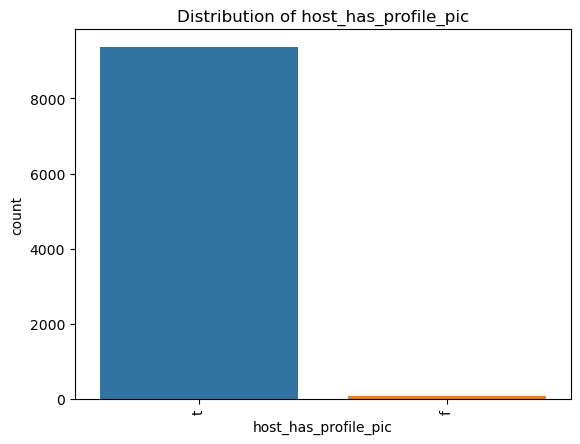

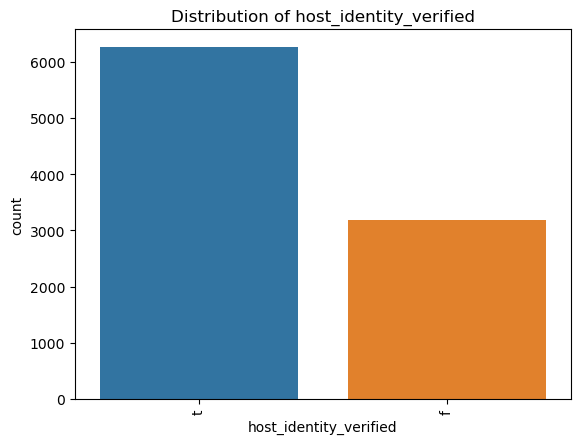

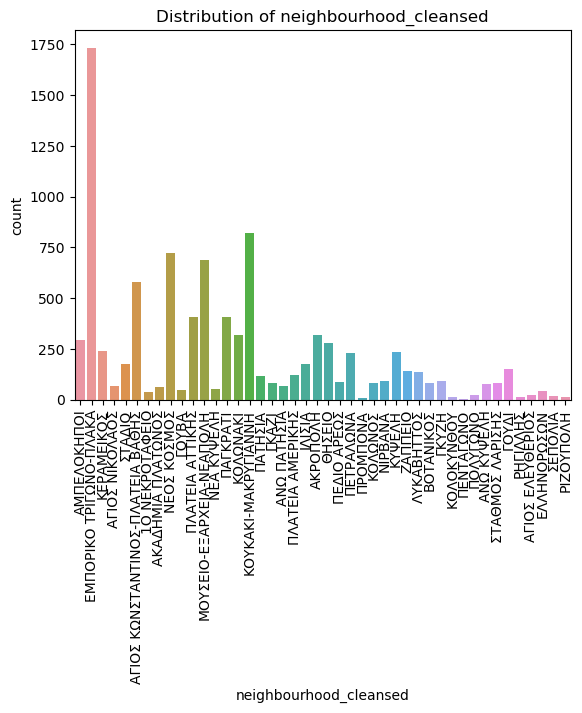

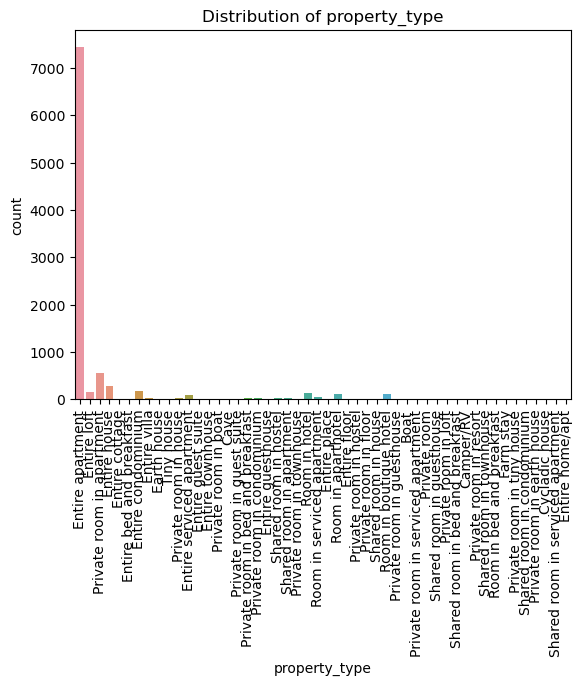

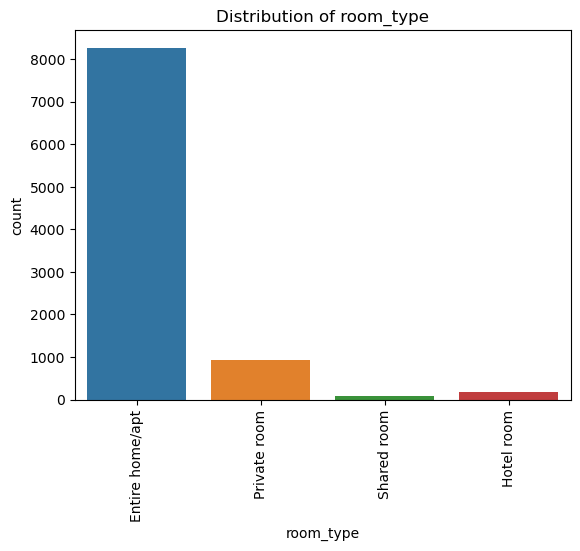

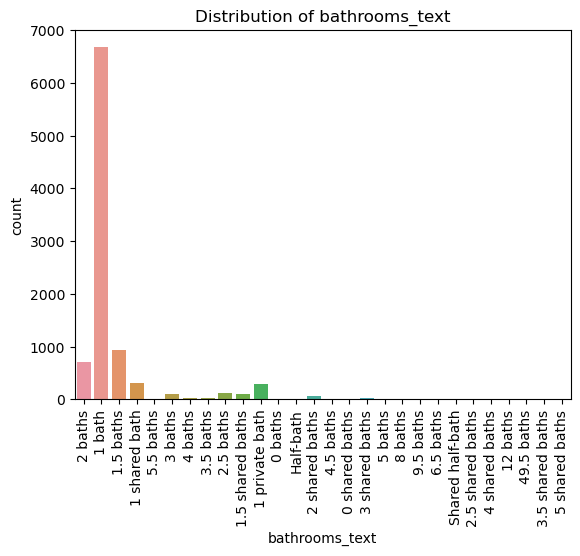

They are not evenly distributed


In [33]:
#distribution of discrete features

selected_discrete_columns= ['host_response_time','host_is_superhost',
                            'host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed','property_type',
                            'room_type','bathrooms_text' ]

df_discrete= df2[selected_discrete_columns]

for column in df_discrete:
    sns.countplot(data=df2, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

print('They are not evenly distributed')

In [34]:
# Categorize the price column
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300+']

merged_df['price_category'] = pd.cut(merged_df['price_x'], bins=bins, labels=labels)
merged_df['price_category'].value_counts()

0-50       600869
50-100     308212
100-150     69121
150-200     31264
300+        19998
200-300     19111
Name: price_category, dtype: int64

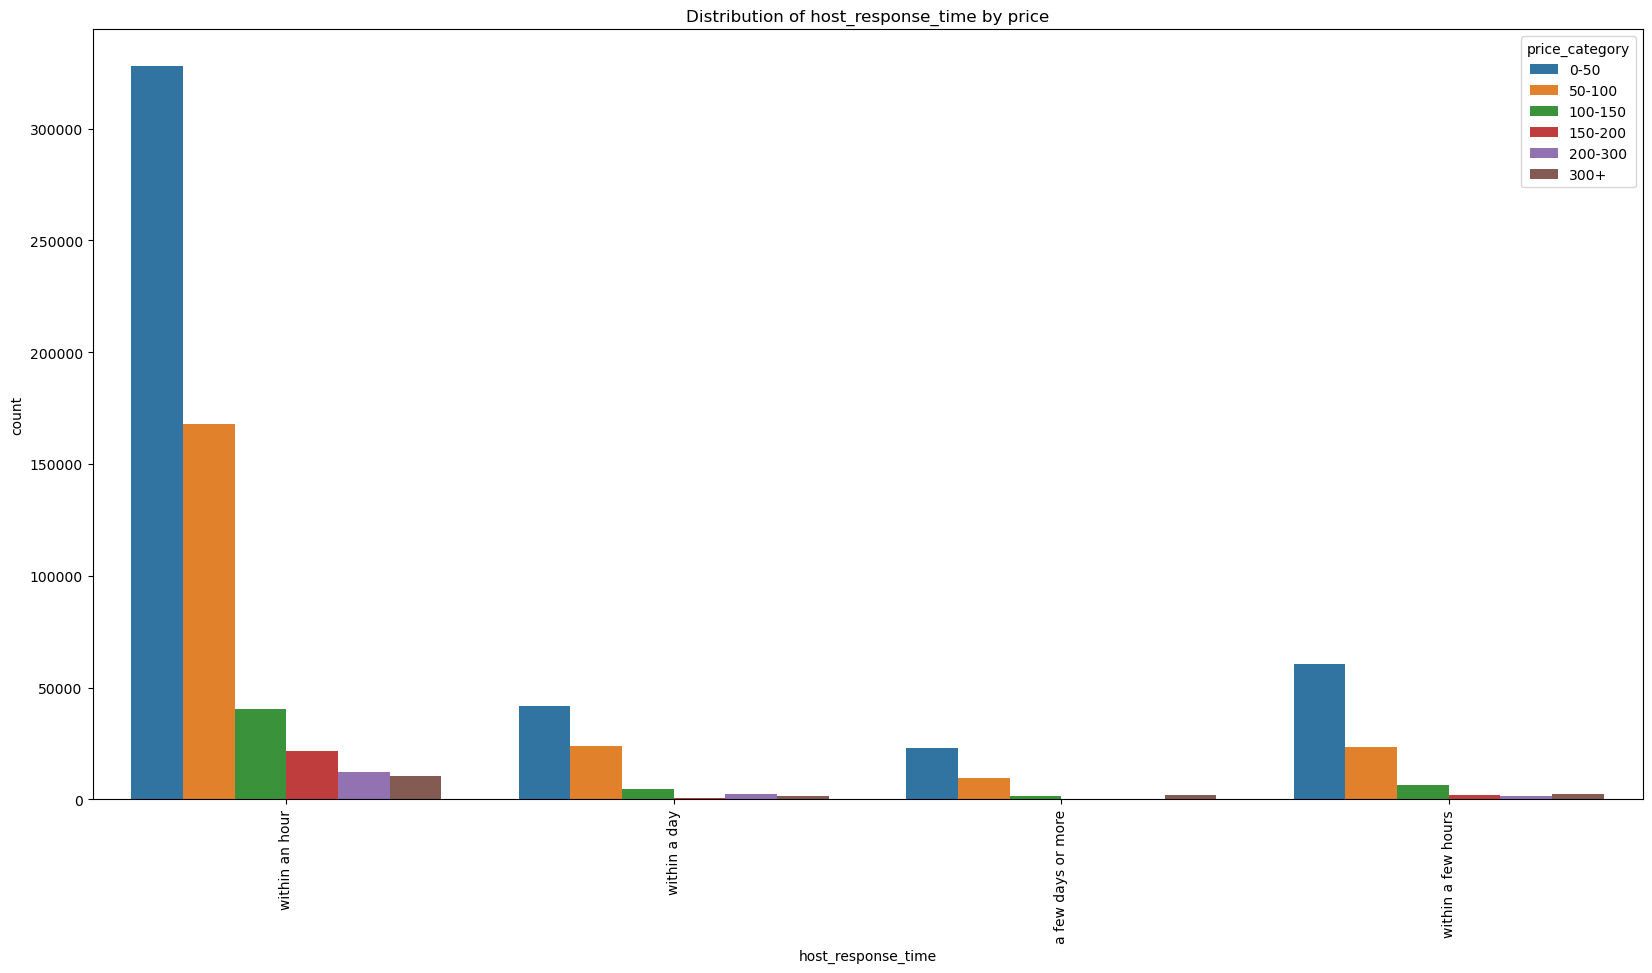

Contingency table for host_response_time and price:
 price_category        0-50  50-100  100-150  150-200  200-300   300+
host_response_time                                                  
a few days or more   23234    9677     1529      349      203   1876
within a day         41986   23912     4731      509     2344   1712
within a few hours   60618   23251     6610     2186     1733   2560
within an hour      327962  167962    40659    21735    12385  10553


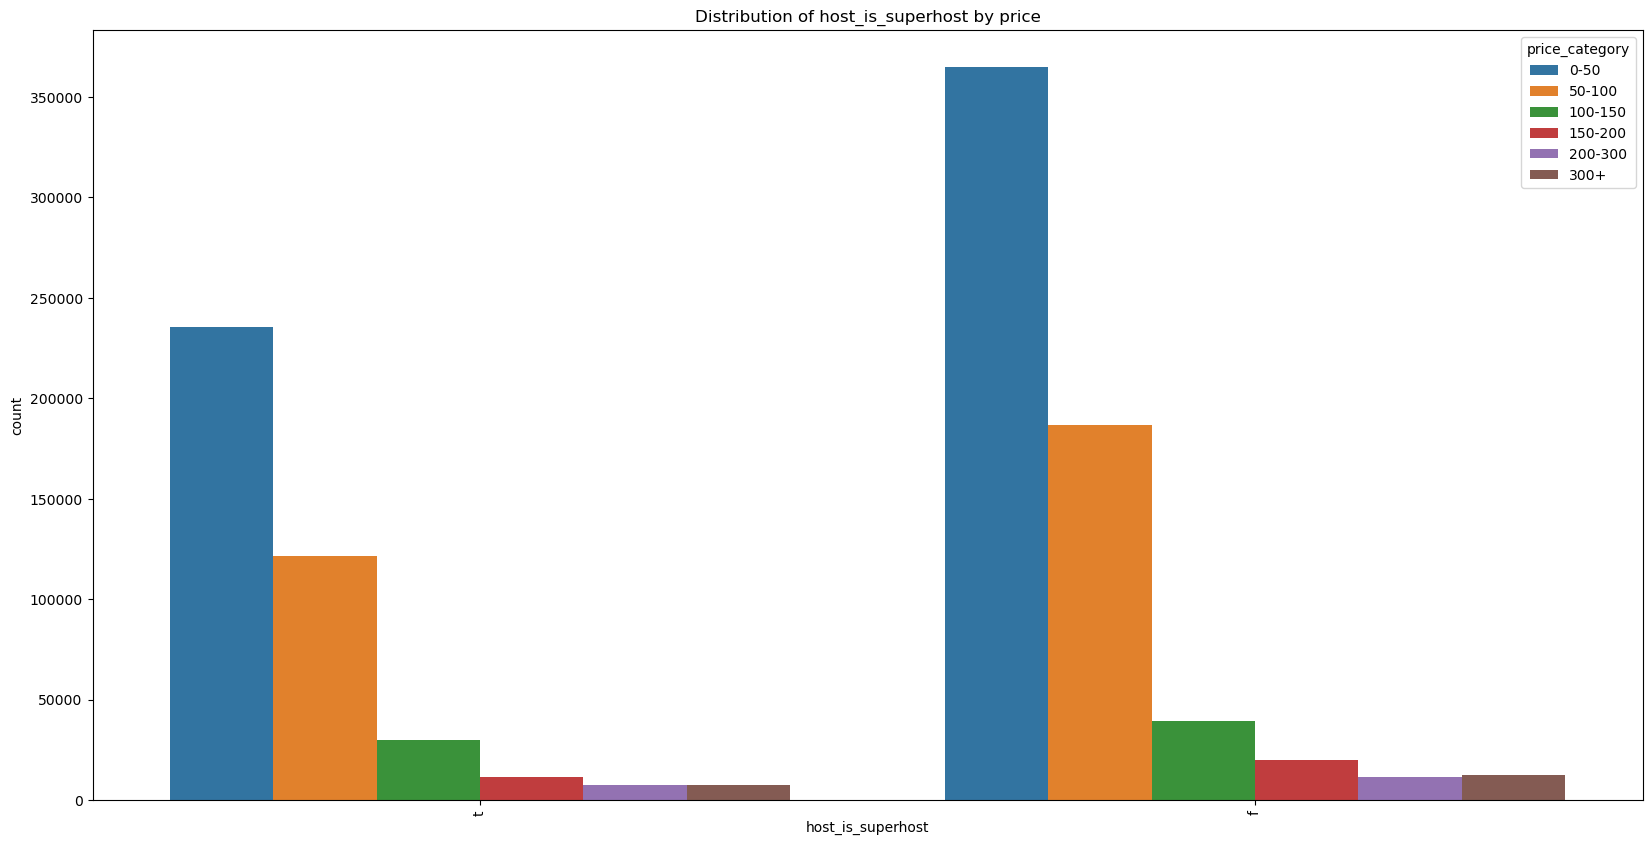

Contingency table for host_is_superhost and price:
 price_category       0-50  50-100  100-150  150-200  200-300   300+
host_is_superhost                                                  
f                  365047  186485    39135    19721    11380  12648
t                  235457  121362    29986    11543     7731   7350


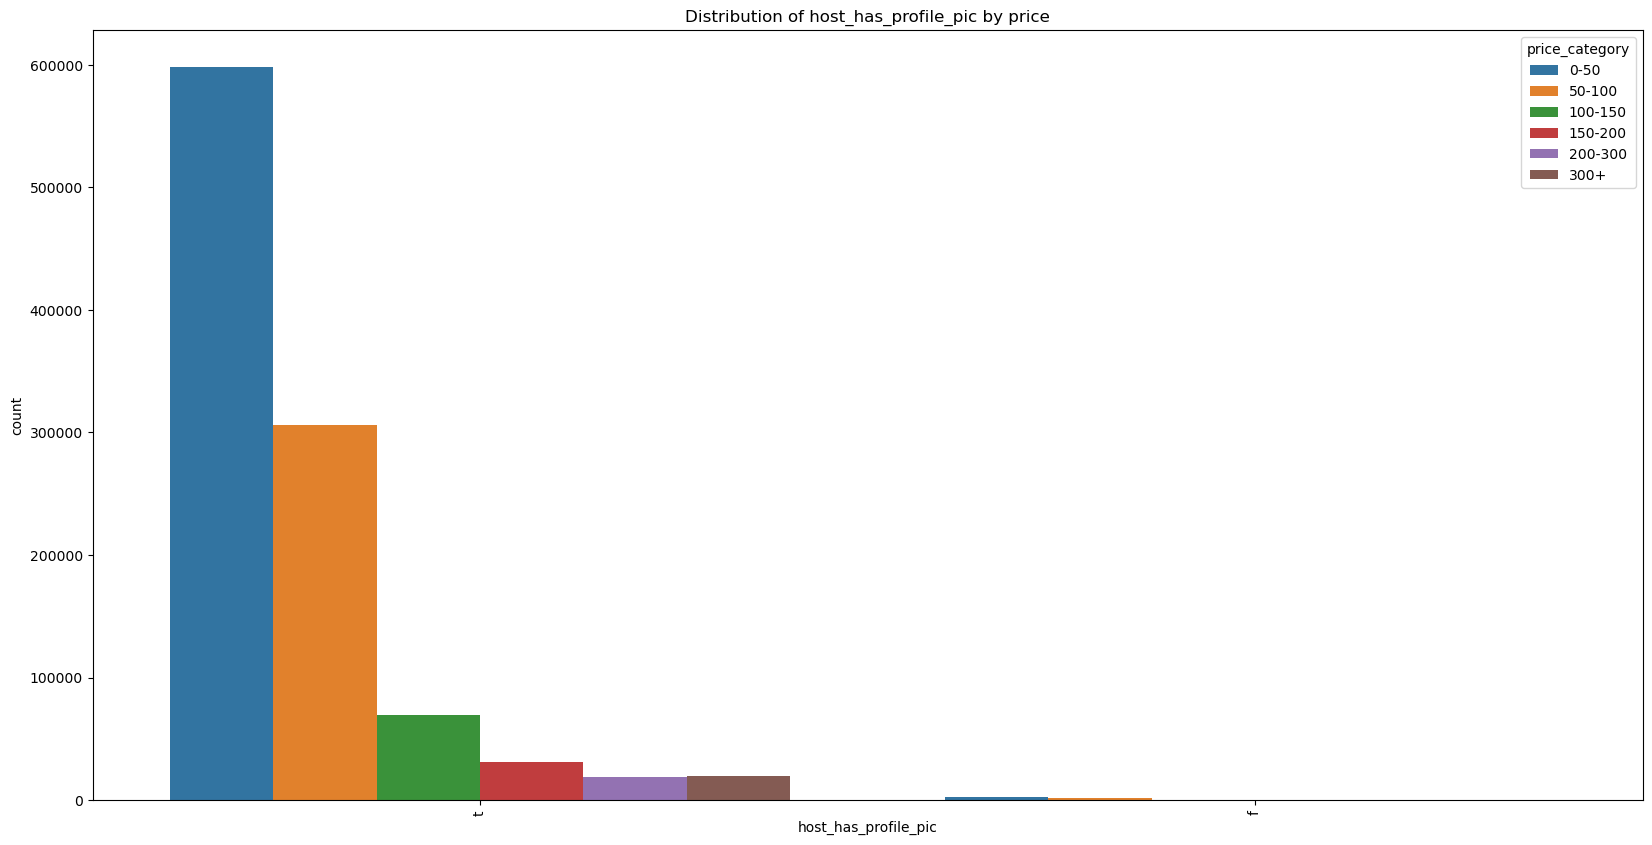

Contingency table for host_has_profile_pic and price:
 price_category          0-50  50-100  100-150  150-200  200-300   300+
host_has_profile_pic                                                  
f                       2113    1537        0        0        0      0
t                     598391  306310    69121    31264    19111  19998


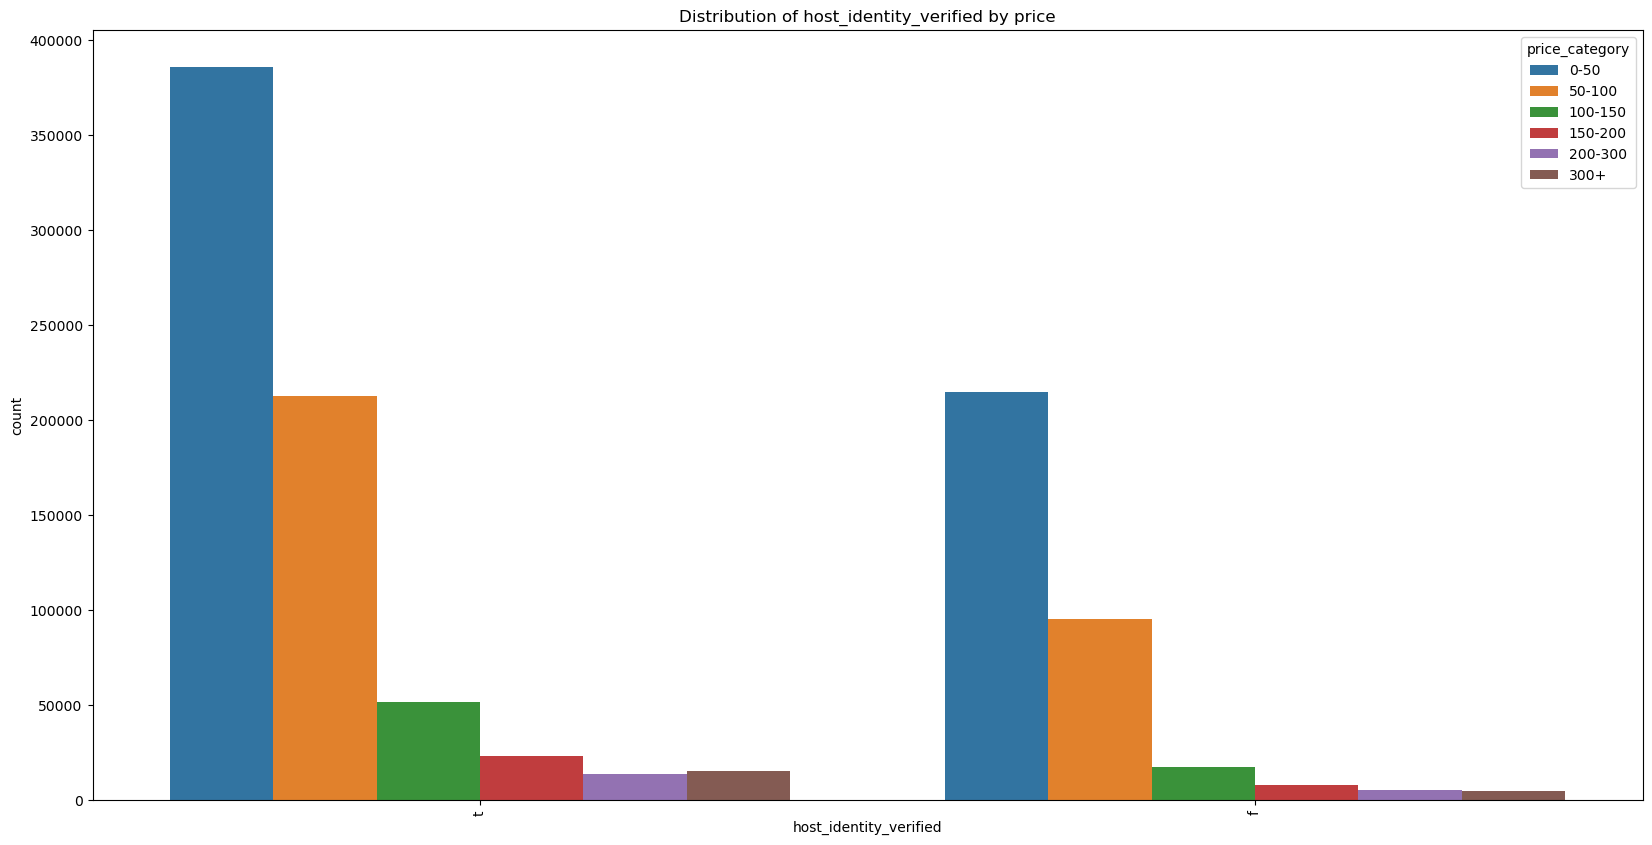

Contingency table for host_identity_verified and price:
 price_category            0-50  50-100  100-150  150-200  200-300   300+
host_identity_verified                                                  
f                       214564   95444    17490     7924     5377   4739
t                       385940  212403    51631    23340    13734  15259


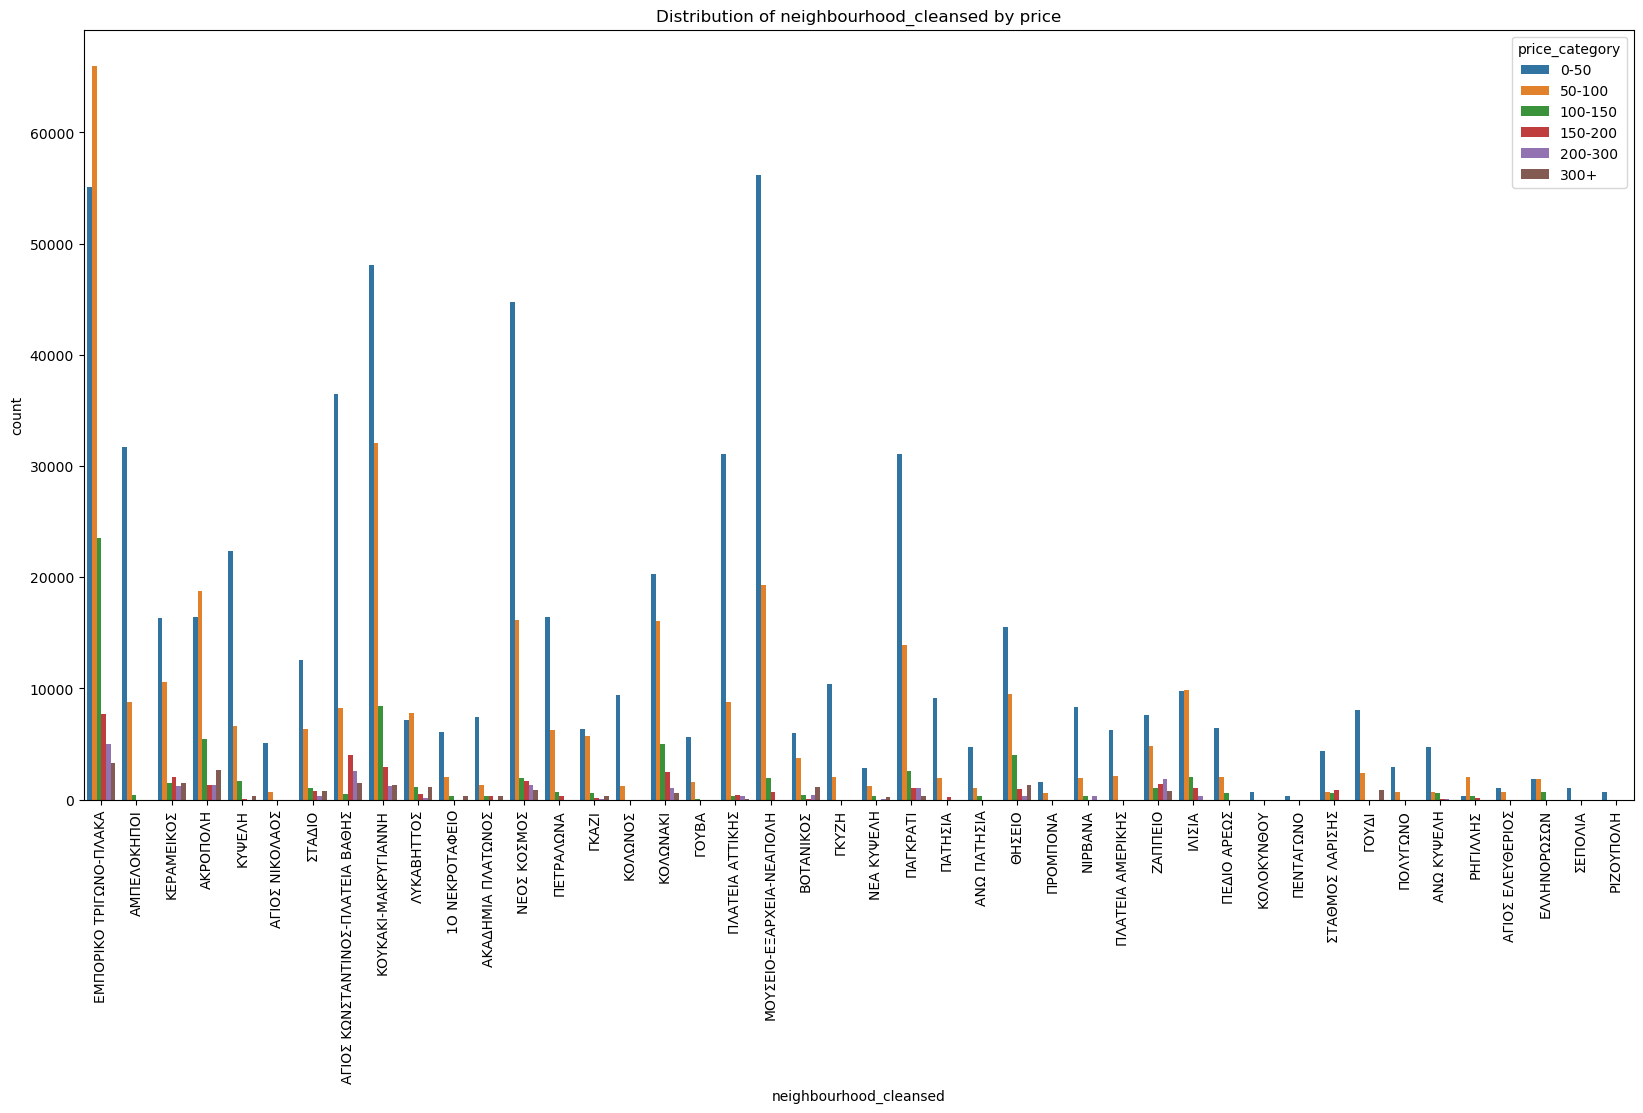

Contingency table for neighbourhood_cleansed and price:
 price_category                     0-50  50-100  100-150  150-200  200-300  \
neighbourhood_cleansed                                                       
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                     6044    2053      298        0        0   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                   1095     730        0        0        0   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  36477    8224      537     4061     2615   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                     5110     730        0        0        0   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                  7457    1309      365      359        0   
ΑΚΡΟΠΟΛΗ                          16466   18772     5477     1287     1292   
ΑΜΠΕΛΟΚΗΠΟΙ                       31673    8812      395        0        0   
ΑΝΩ ΚΥΨΕΛΗ                         4745     730      615       46       69   
ΑΝΩ ΠΑΤΗΣΙΑ                        4745    1095      365        0        0   
ΒΟΤΑΝΙΚΟΣ                          5959    3707      415       21      403   
ΓΚΑΖΙ  

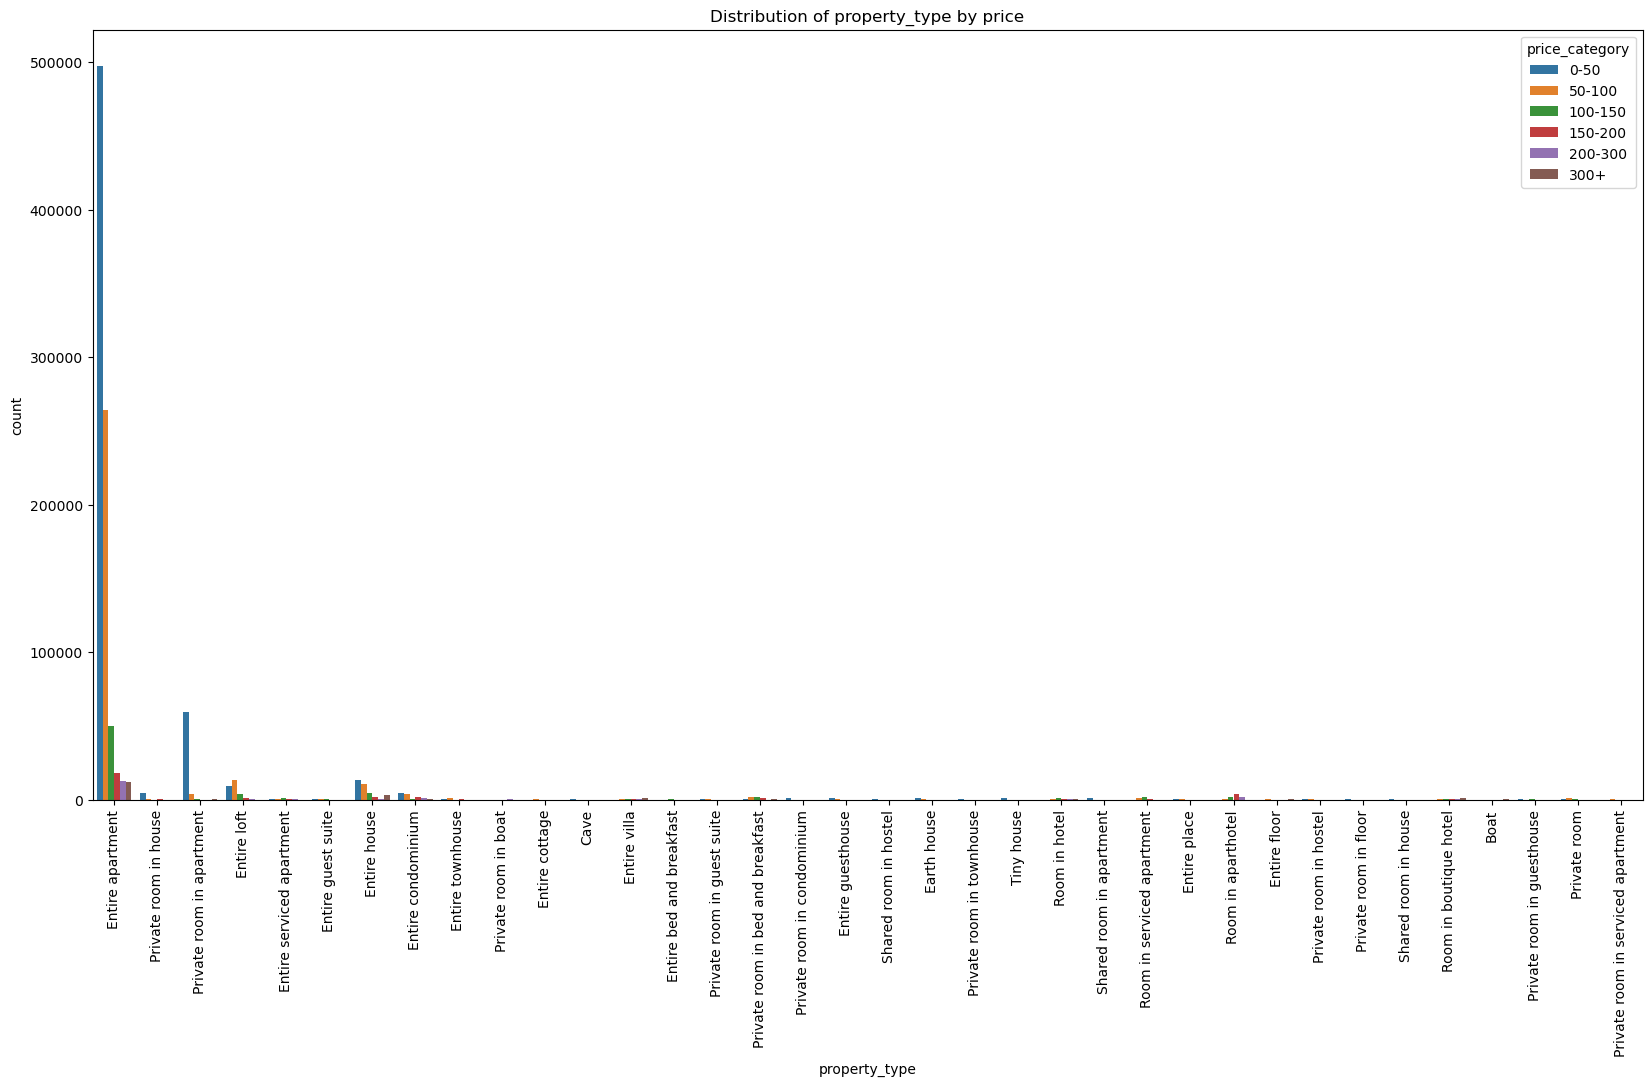

Contingency table for property_type and price:
 price_category                        0-50  50-100  100-150  150-200  200-300  \
property_type                                                                   
Boat                                     0       0        0        0        0   
Cave                                   365       0        0        0        0   
Earth house                           1005     821        0        0        0   
Entire apartment                    497165  264298    49764    18131    12712   
Entire bed and breakfast                 0       0      365        0        0   
Entire condominium                    4661    3591      703     1723     1102   
Entire cottage                           0     365        0        0        0   
Entire floor                             0     723        7        0      127   
Entire guest suite                     730     365      365        0        0   
Entire guesthouse                     1356     469        0  

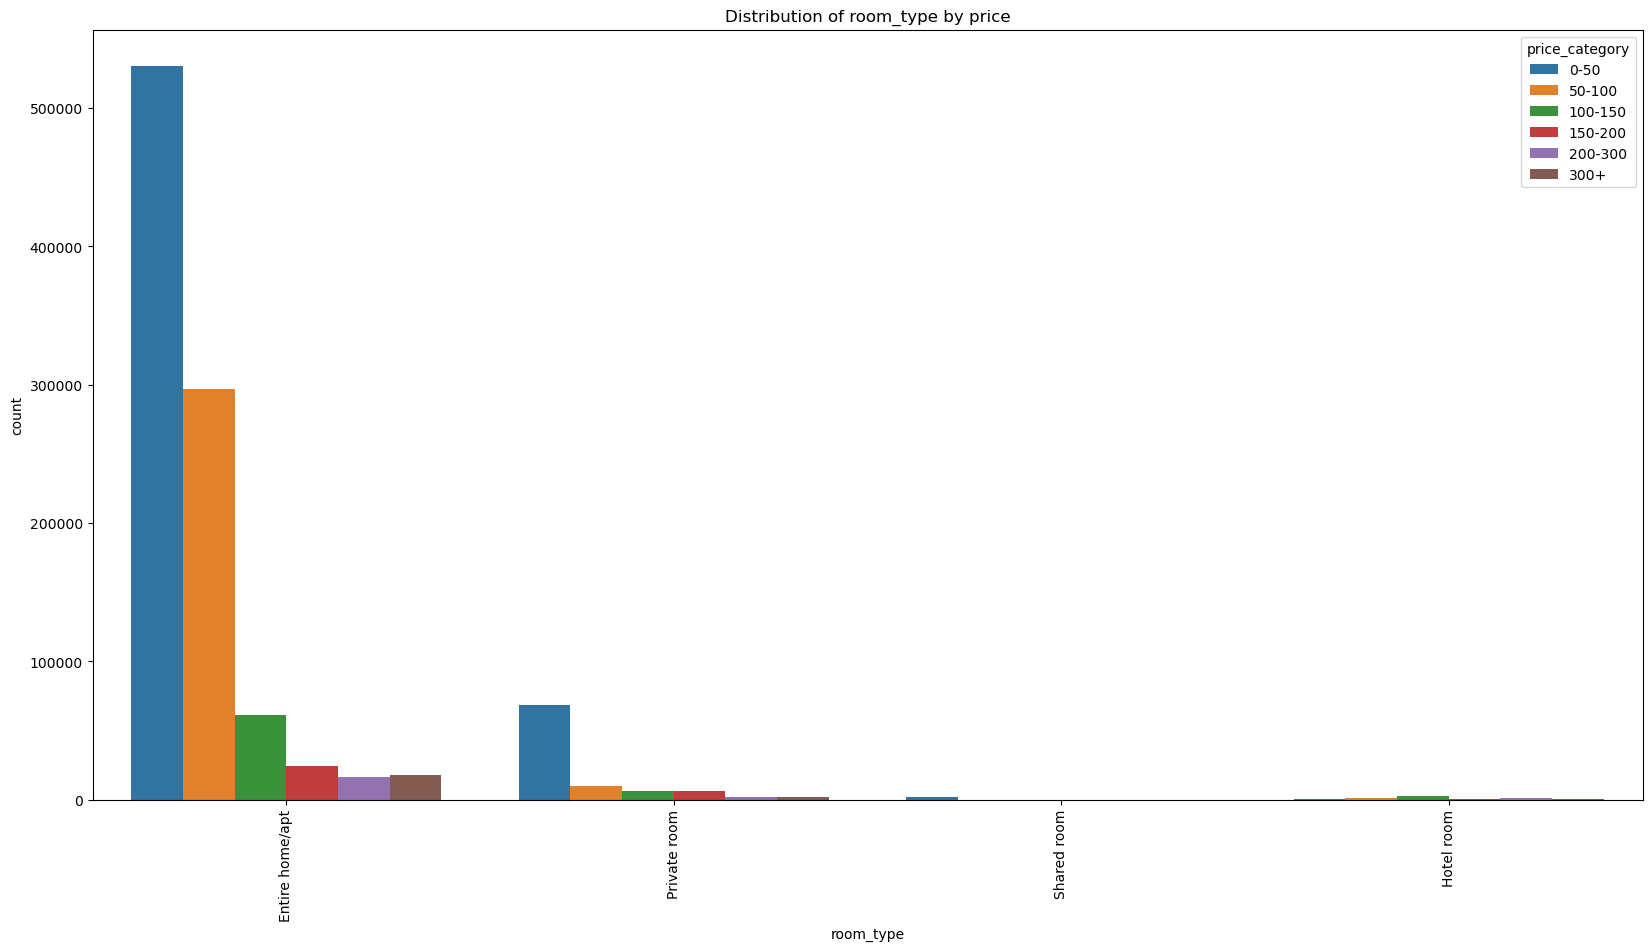

Contingency table for room_type and price:
 price_category     0-50  50-100  100-150  150-200  200-300   300+
room_type                                                        
Entire home/apt  530279  296772    60887    24221    16096  17747
Hotel room          128    1500     2242      741      902    329
Private room      68637    9940     5992     6302     2113   1922
Shared room        1825       0        0        0        0      0


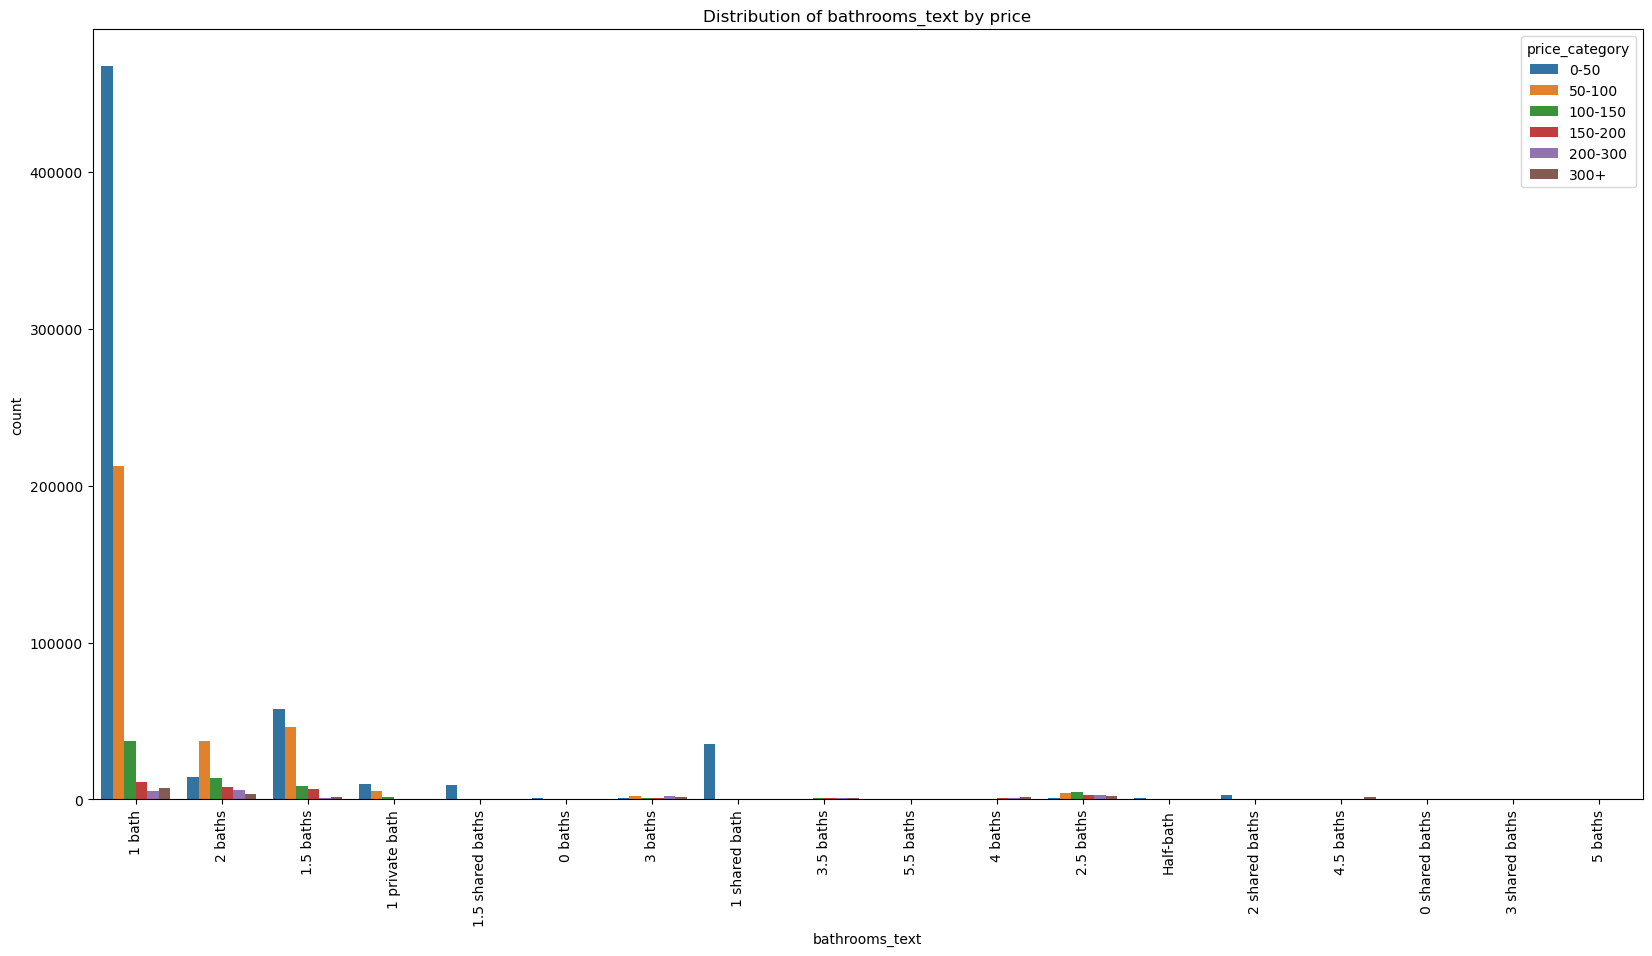

Contingency table for bathrooms_text and price:
 price_category      0-50  50-100  100-150  150-200  200-300  300+
bathrooms_text                                                   
0 baths              731     364        0        0        0     0
0 shared baths       365       0        0        0        0     0
1 bath            467249  212453    37199    11025     5538  7028
1 private bath     10093    5495     1722      140       71     0
1 shared bath      35399       0        0        8        0     0
1.5 baths          57921   45904     8748     6878      780  1322
1.5 shared baths    9490       0      365        0        0     0
2 baths            14346   36974    13958     8186     6159  3240
2 shared baths      2555       0        0        0        0     0
2.5 baths            980    4296     4632     2704     2568  2342
3 baths              645    2511     1118      621     2125  1741
3 shared baths         0     185      180        0        0     0
3.5 baths              0   

In [35]:
###Searching for any discrete features that are related to 'price_category'

target_var=merged_df['price_category']

for column in selected_discrete_columns:
    plt.figure(figsize=(20, 10))
    sns.countplot(data=merged_df, x=column, hue=target_var) 
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column} by price')
    plt.show()
    
    contingency_table = pd.crosstab(merged_df[column], merged_df['price_category'])
    print(f"Contingency table for {column} and price:\n", contingency_table)

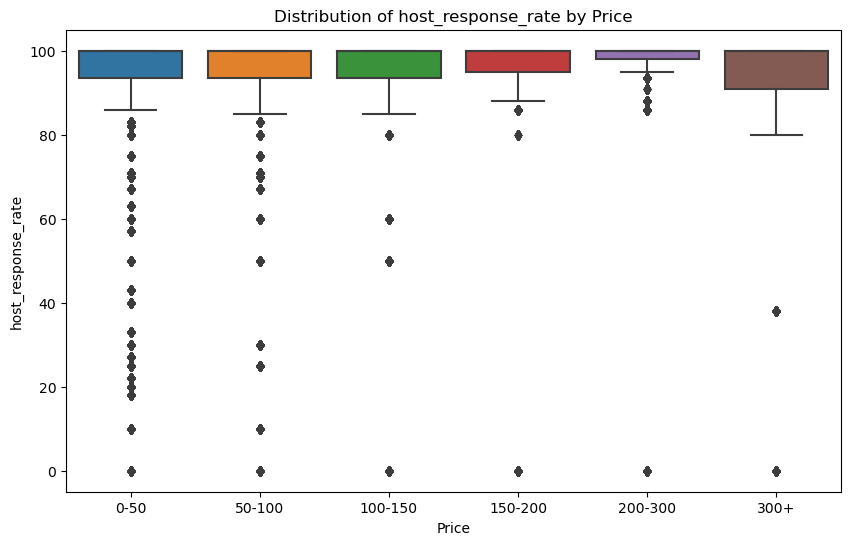

Contingency table for host_response_rate and price:
 price_category        0-50  50-100  100-150  150-200  200-300   300+
host_response_rate                                                  
0.00000              14473    6757     1529      349      203   1511
10.00000               365     365        0        0        0      0
18.00000               731       0        0        0        0      0
20.00000              1460       0        0        0        0      0
22.00000               365       0        0        0        0      0
25.00000              1095     365        0        0        0      0
27.00000               365       0        0        0        0      0
30.00000               730    2190        0        0        0      0
33.00000              1095       0        0        0        0      0
38.00000                 0       0        0        0        0    365
40.00000              1460       0        0        0        0      0
43.00000              1095       0        0       

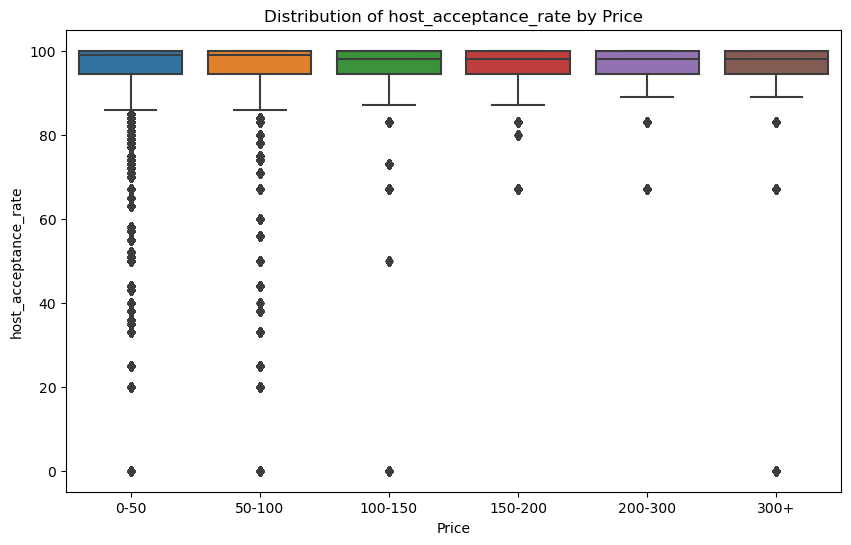

Contingency table for host_acceptance_rate and price:
 price_category          0-50  50-100  100-150  150-200  200-300  300+
host_acceptance_rate                                                 
0.000000               16054    5848      731        0        0   365
20.000000                730     365        0        0        0     0
25.000000               2191     365        0        0        0     0
33.000000               2190     365        0        0        0     0
35.000000               1095       0        0        0        0     0
36.000000                365       0        0        0        0     0
38.000000                730     365        0        0        0     0
40.000000               1356     104        0        0        0     0
43.000000               1460       0        0        0        0     0
44.000000                372     358        0        0        0     0
50.000000               7666    2153       37        0        0     0
51.000000                365       

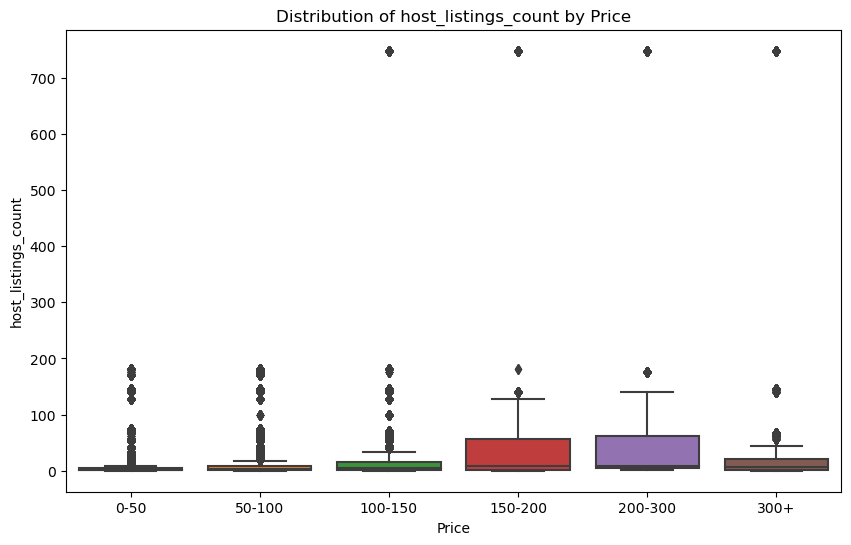

Contingency table for host_listings_count and price:
 price_category         0-50  50-100  100-150  150-200  200-300  300+
host_listings_count                                                 
0.0                   11730    5727     2243      263        0   113
1.0                  252060  101264    15932     5179     1830  3571
2.0                   98676   46561     6494     3290     1626  1781
3.0                   54113   26322     3342     1533      781  1151
4.0                   38969   16788     4375      636     1641  1107
5.0                   17471   14217     3720     1528     1912   940
6.0                   13591    8659     4894     1231      678  1608
7.0                    9717    3270      597      771      843  1594
8.0                    7256    8256     2471      493      484   386
9.0                    6806    4713     1319     1450      412   265
10.0                   8575    7415     3186     2042      684     0
11.0                   3085    1488      173     

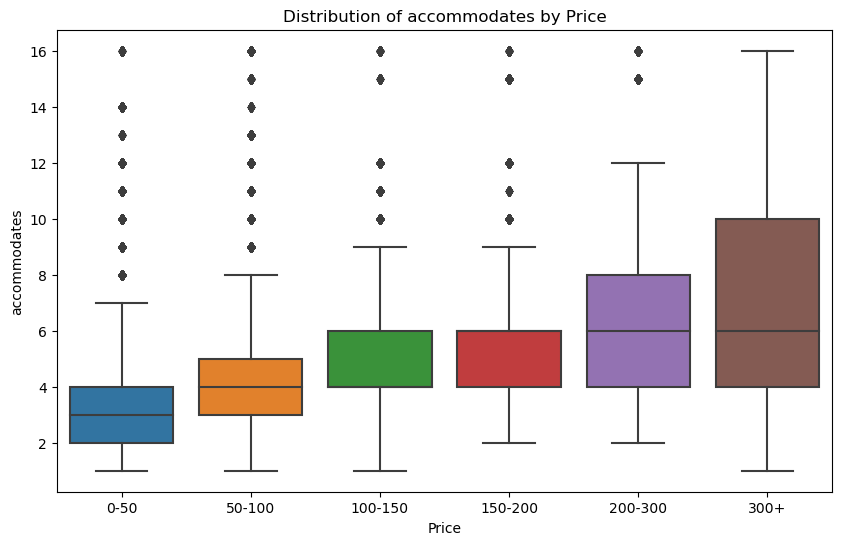

Contingency table for accommodates and price:
 price_category    0-50  50-100  100-150  150-200  200-300  300+
accommodates                                                   
1                16172    2929      207        0        0   403
2               202025   50414     7945     1450     1049   888
3               107344   37365     6334     1669      557  1866
4               172160  112794    20991     9582     3372  3924
5                47850   34377     9744     2415     2114   453
6                35041   41834    13375    10551     4662  3314
7                 8459    9629     1331      654      717   749
8                 8375   12133     4906     2552     3228  3118
9                 1478    2744     1679      916      245   238
10                 457     479     1190      212      724  1318
11                 730     365      334       31        0   730
12                 295     237      918      878     1435   252
13                  75    1020        0        0        0

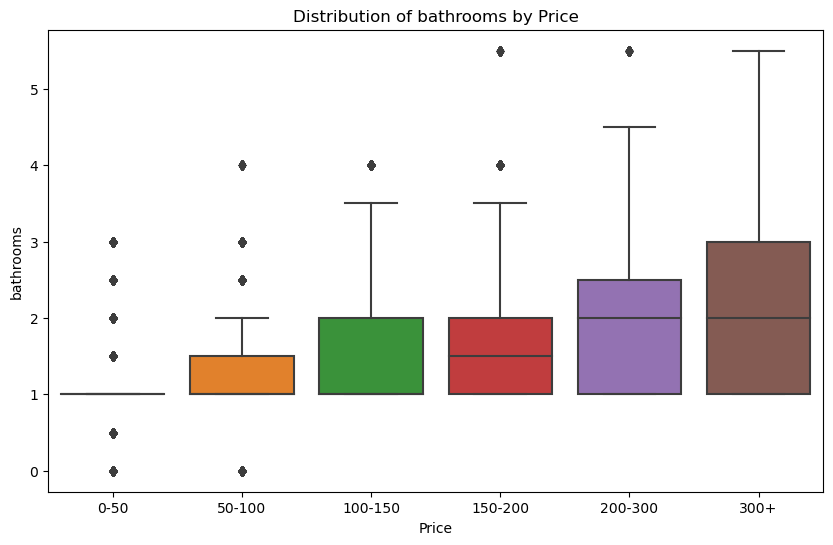

Contingency table for bathrooms and price:
 price_category    0-50  50-100  100-150  150-200  200-300  300+
bathrooms                                                      
0.0               1096     364        0        0        0     0
0.5               1095       0        0        0        0     0
1.0             512741  217948    38921    11173     5609  7028
1.5              67411   45904     9113     6878      780  1322
2.0              16901   36974    13958     8186     6159  3240
2.5                980    4296     4632     2704     2568  2342
3.0                645    2696     1298      621     2125  1741
3.5                  0       0      652      767      771   730
4.0                  0      30      547      883      936  1254
4.5                  0       0        0        0       60  1400
5.0                  0       0        0        0        0   365
5.5                  0       0        0       52      103   576


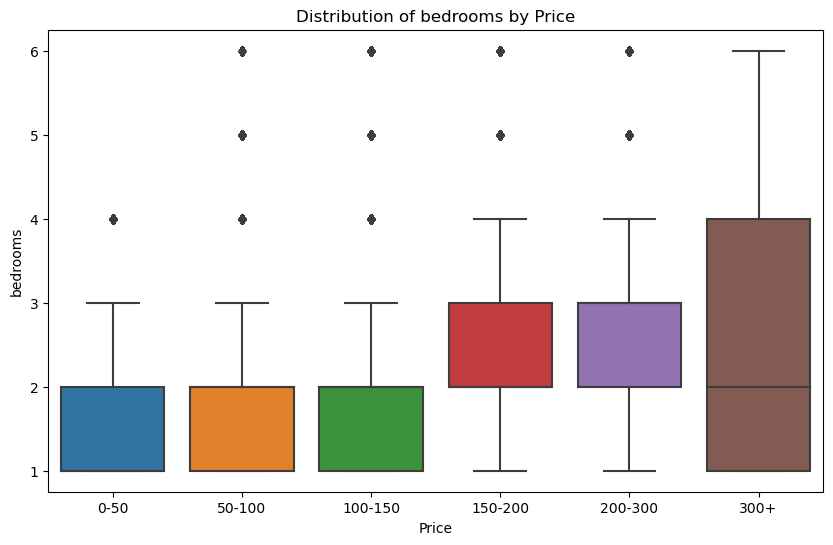

Contingency table for bedrooms and price:
 price_category    0-50  50-100  100-150  150-200  200-300  300+
bedrooms                                                       
1.0             391545  141428    23794     7205     3963  5011
2.0             134162  117185    27268    15361     5113  4612
3.0              17720   27925    11305     5795     6029  3498
4.0               2005    5895     1569     1743     2593  1892
5.0                  0     737      818      273      677  2971
6.0                  0     108      749      485      521  1058


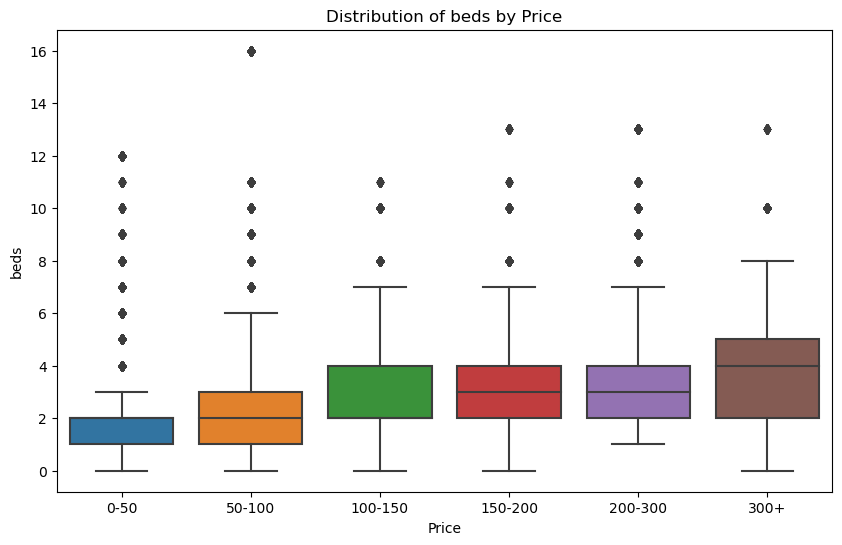

Contingency table for beds and price:
 price_category    0-50  50-100  100-150  150-200  200-300  300+
beds                                                           
0.0              11122    4512      688      105        0   365
1.0             264894   87106    15175     3561     2129  2239
2.0             200411  100529    20526    11433     3034  5504
3.0              74379   65181    15083     7338     6059   825
4.0              32392   28399     8730     4652     3335  3891
5.0               8329   11349     4523     2618     1750  2459
6.0               4831    5583     1814      863      661  1945
7.0               1649    1005     1072       82      378  1654
8.0               1825    1096     1095      365      730   365
9.0                157    1303        0        0      365     0
10.0                75     655      365      158      207   730
11.0                75     763       50       50      158     0
12.0               365       0        0        0        0     0
1

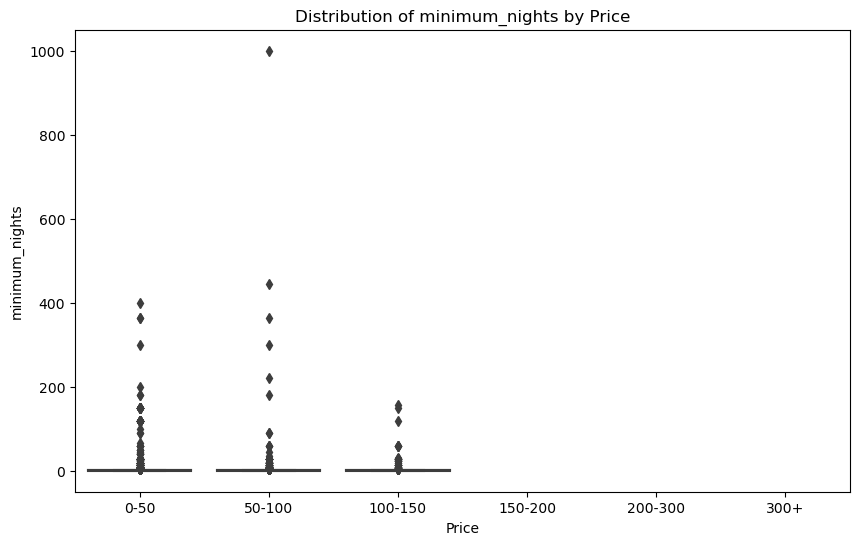

Contingency table for minimum_nights and price:
 price_category  0-50  50-100  100-150
minimum_nights                       
1.0             2588    1338      361
2.0             2115    1115      239
3.0              525     334       63
4.0              108      86       12
5.0               96      59       13
6.0               18      12        4
7.0               49      26        6
8.0                3       2        0
9.0                2       0        0
10.0              18      11        4
11.0               1       0        0
12.0               0       1        0
13.0               0       1        0
14.0              10       6        4
15.0              20       4        3
18.0               1       0        0
19.0               3       1        0
20.0              23       7        2
21.0               0       2        0
24.0               0       0        1
25.0               2       0        3
26.0               0       0        1
27.0               2       0        0
2

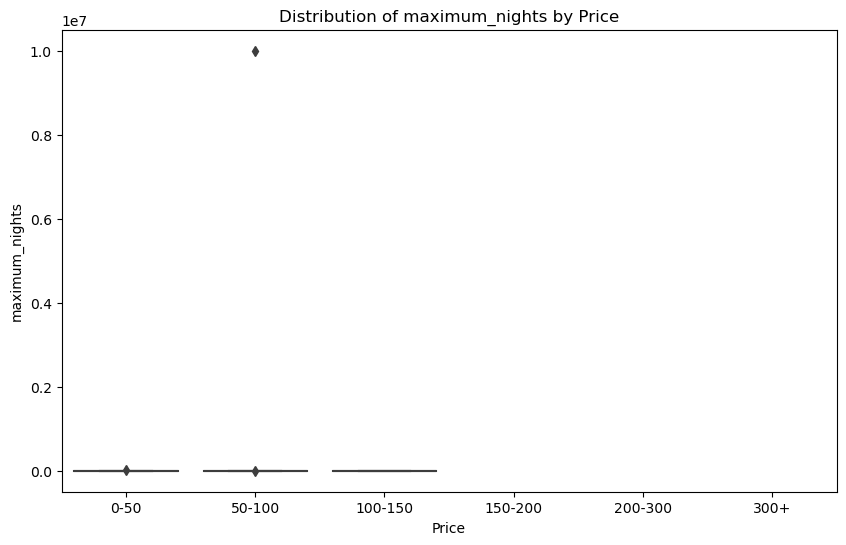

Contingency table for maximum_nights and price:
 price_category  0-50  50-100  100-150
maximum_nights                       
1.0               10       3        2
2.0                2       0        1
3.0               13       5        0
4.0               18       7        0
5.0                9      11        0
...              ...     ...      ...
1125.0          3398    1719      472
1333.0             0       1        0
4444.0             0       1        0
10000.0            1       0        0
9999999.0          0       1        0

[147 rows x 3 columns]


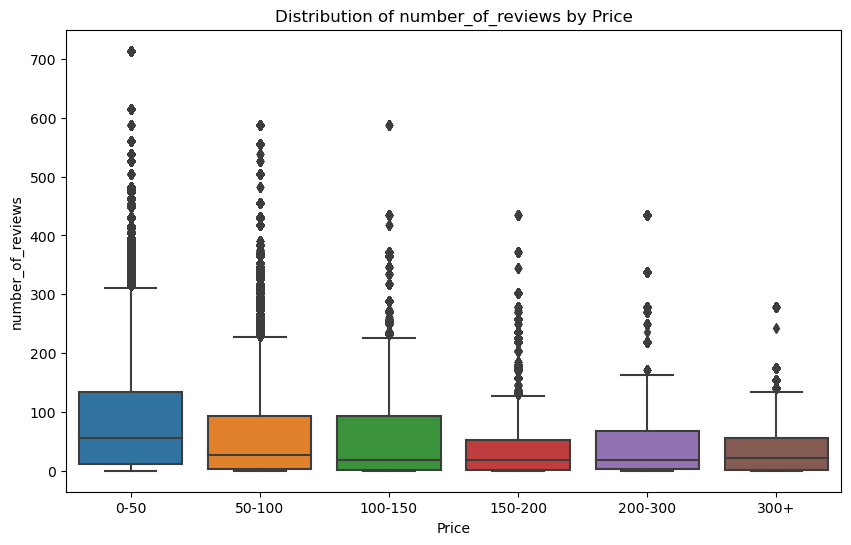

Contingency table for number_of_reviews and price:
 price_category      0-50  50-100  100-150  150-200  200-300  300+
number_of_reviews                                                
0                  47325   45941    13457     5100     3575  4695
1                  21758   16694     4285      758      656   383
2                  12903   10157     3536     2232      385   718
3                   9652    8032     1688     1258      867   771
4                   8981   10429     2022     1301      629     0
...                  ...     ...      ...      ...      ...   ...
556                    0     365        0        0        0     0
560                  365       0        0        0        0     0
588                  122     228       15        0        0     0
615                  365       0        0        0        0     0
714                  366       0        0        0        0     0

[368 rows x 6 columns]


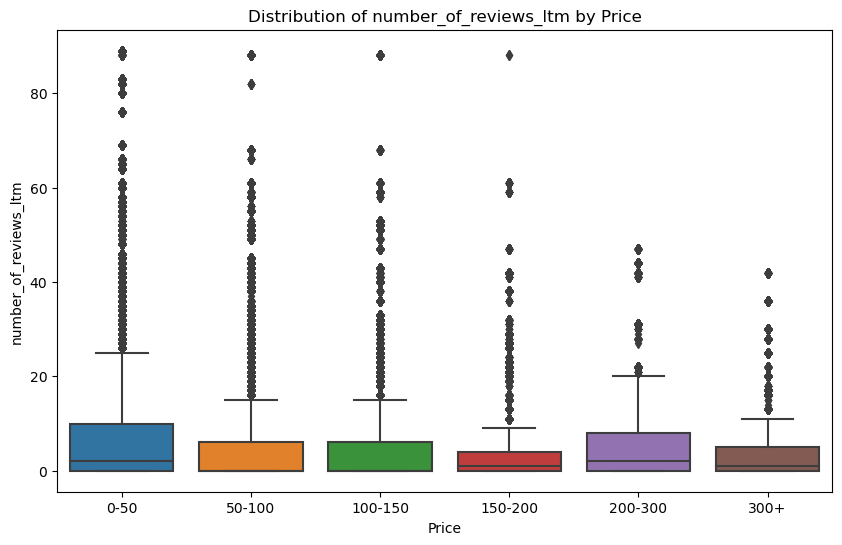

Contingency table for number_of_reviews_ltm and price:
 price_category           0-50  50-100  100-150  150-200  200-300  300+
number_of_reviews_ltm                                                 
0                      216445  155314    36473    15076     7285  9995
1                       50083   28721     4701     3542     1968  1878
2                       34157   14757     3905     2556     1134  1246
3                       31962   12855     2425     1249     1415   468
4                       20501   10091     2124     1124      779   425
...                       ...     ...      ...      ...      ...   ...
80                        365       0        0        0        0     0
82                       1087       9        0        0        0     0
83                        365       0        0        0        0     0
88                        127     419      183        2        0     0
89                        365       0        0        0        0     0

[73 rows x 6 columns

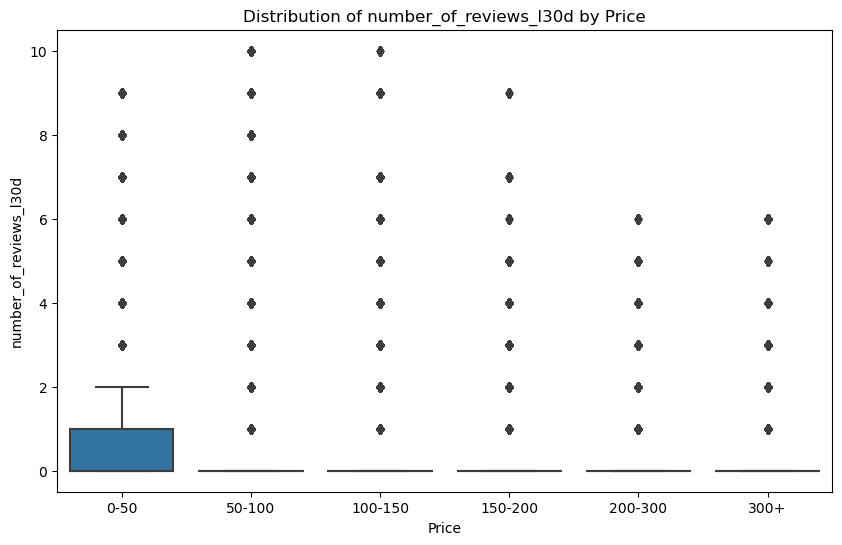

Contingency table for number_of_reviews_l30d and price:
 price_category            0-50  50-100  100-150  150-200  200-300   300+
number_of_reviews_l30d                                                  
0                       443117  254341    55615    25966    14489  15588
1                        73642   23530     3920     1632     2314   1916
2                        37214   10624     3882     1017      388    899
3                        16903    8628     2670     1195      992   1005
4                        12460    4526     1080      722      701    221
5                         7834    2041      230      579      164    103
6                         5272    2429      678       53       63    266
7                         1675     935      609       66        0      0
8                         1292     533        0        0        0      0
9                         1460     289      407       34        0      0
10                           0     336       30        0        0  

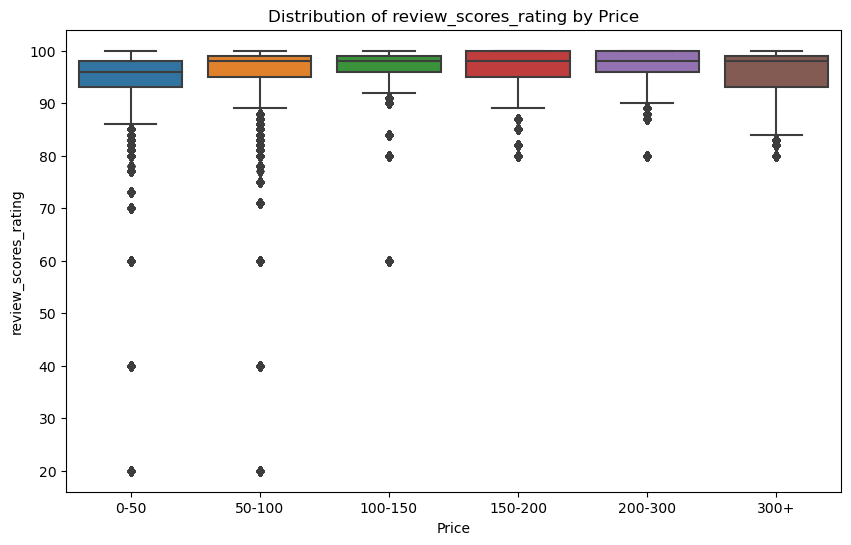

Contingency table for review_scores_rating and price:
 price_category         0-50  50-100  100-150  150-200  200-300  300+
review_scores_rating                                                
20.0                    730     365        0        0        0     0
40.0                    730     365        0        0        0     0
60.0                   1577     248      730        0        0     0
70.0                    365       0        0        0        0     0
71.0                      0     365        0        0        0     0
73.0                    365       0        0        0        0     0
75.0                      0     365        0        0        0     0
77.0                    676      54        0        0        0     0
78.0                    117     248        0        0        0     0
80.0                   5519    3644     1339      883      365   298
81.0                   1095     365        0        0        0     0
82.0                   2391    1460        0    

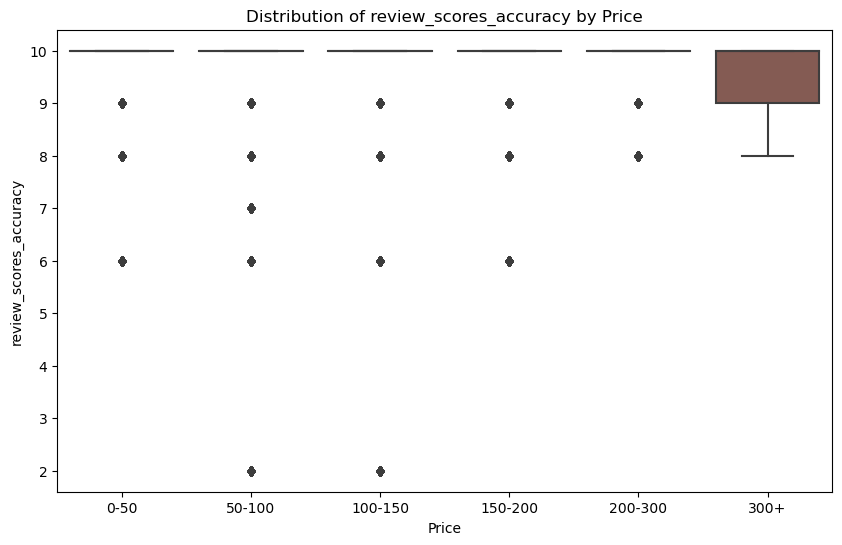

Contingency table for review_scores_accuracy and price:
 price_category            0-50  50-100  100-150  150-200  200-300   300+
review_scores_accuracy                                                  
2.0                          0     730      365        0        0      0
6.0                       1212     248      730      365        0      0
7.0                          0    1095        0        0        0      0
8.0                       6869    3967      943      883      365    482
9.0                      99680   29555     4499     3677     2638   3907
10.0                    440046  222766    47646    20686    12533  10914


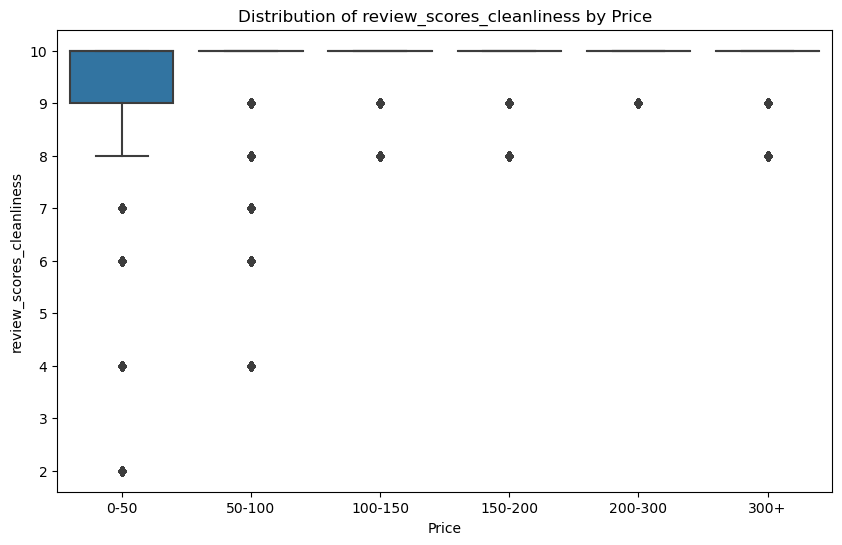

Contingency table for review_scores_cleanliness and price:
 price_category               0-50  50-100  100-150  150-200  200-300   300+
review_scores_cleanliness                                                  
2.0                           365       0        0        0        0      0
4.0                           847     978        0        0        0      0
6.0                          1721     469        0        0        0      0
7.0                          1825    1095        0        0        0      0
8.0                         23293    5246      718      742        0    663
9.0                        150707   44829     6848     4156     2001   2948
10.0                       369049  205744    46617    20713    13535  11692


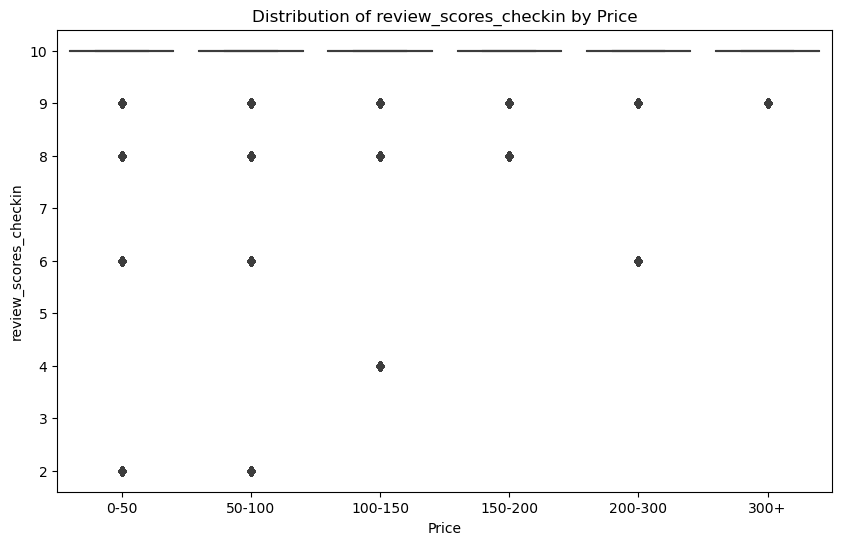

Contingency table for review_scores_checkin and price:
 price_category           0-50  50-100  100-150  150-200  200-300   300+
review_scores_checkin                                                  
2.0                       365     365        0        0        0      0
4.0                         0       0      365        0        0      0
6.0                      1825     365        0        0      365      0
8.0                      3141    1221      852      261        0      0
9.0                     46562   20743     4448     2686     1409   1174
10.0                   495914  235667    48518    22664    13762  14129


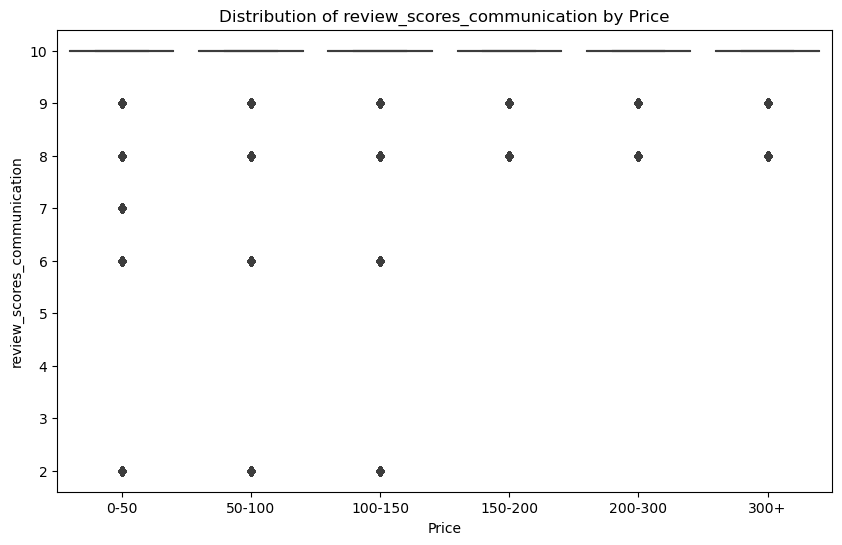

Contingency table for review_scores_communication and price:
 price_category                 0-50  50-100  100-150  150-200  200-300   300+
review_scores_communication                                                  
2.0                             365     365      365        0        0      0
6.0                            1212     248      365        0        0      0
7.0                             365       0        0        0        0      0
8.0                            3594    2489     1065      518      897    198
9.0                           49315   17876     3318     1851     1725   1473
10.0                         492956  237383    49070    23242    12914  13632


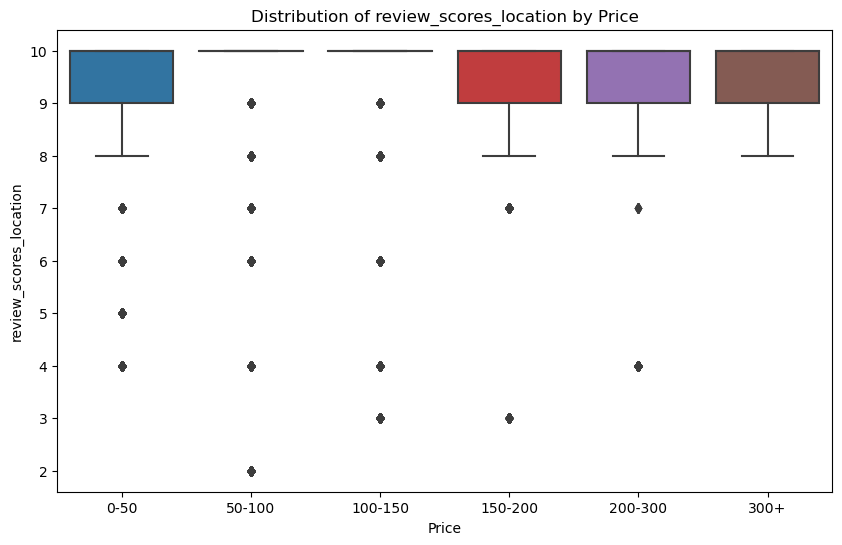

Contingency table for review_scores_location and price:
 price_category            0-50  50-100  100-150  150-200  200-300   300+
review_scores_location                                                  
2.0                          0     365        0        0        0      0
3.0                          0       0      213      153        0      0
4.0                        730     730      365        0      365      0
5.0                        365       0        0        0        0      0
6.0                        809     651      365        0        0      0
7.0                       4172    1303        0      724        6      0
8.0                      29198    7316     1374     1185      696   1115
9.0                     183256   51701     8476     6985     4298   3858
10.0                    329277  196295    43390    16564    10171  10330


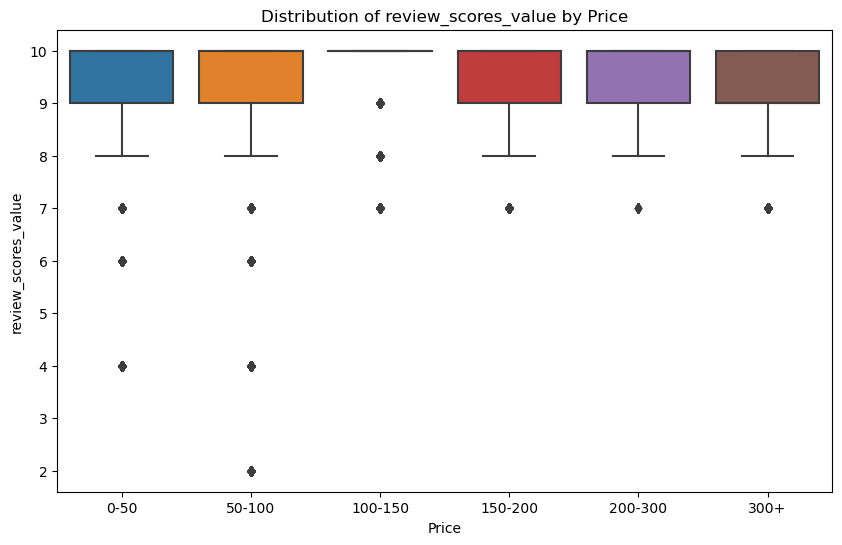

Contingency table for review_scores_value and price:
 price_category         0-50  50-100  100-150  150-200  200-300  300+
review_scores_value                                                 
2.0                       0     365        0        0        0     0
4.0                     847     248        0        0        0     0
6.0                    1904     651        0        0        0     0
7.0                     798    1095      213      511        7   298
8.0                   10679    7470     1382      943      518   548
9.0                  165347   62636    10238     6340     6401  6877
10.0                 368232  185896    41985    17817     8610  7580


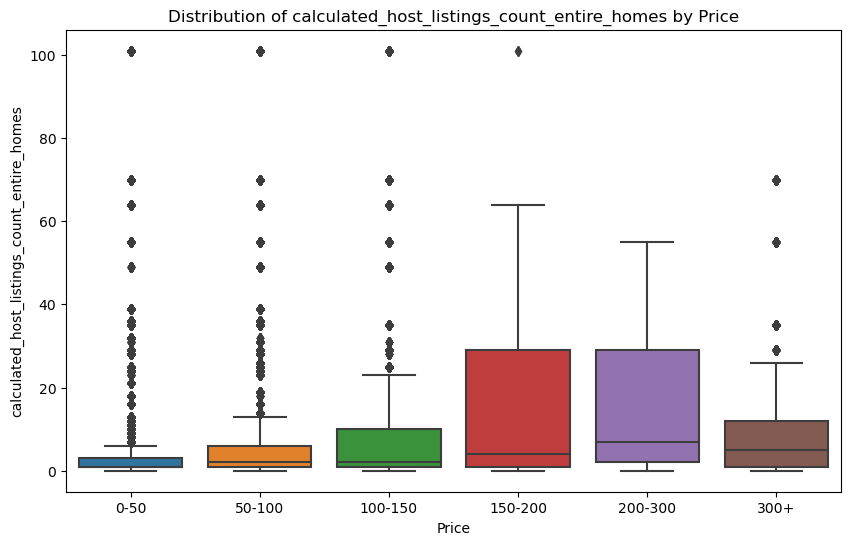

Contingency table for calculated_host_listings_count_entire_homes and price:
 price_category                                 0-50  50-100  100-150  150-200  \
calculated_host_listings_count_entire_homes                                     
0                                             45163    7908     5370     1751   
1                                            323466  144624    23957     8309   
2                                             69304   31394     5967     3237   
3                                             39931   18570     2622     1690   
4                                             17149    9923     2045      850   
5                                             16237   13578     3126      873   
6                                              7663    6630     2676      390   
7                                             11822    5768     2700      338   
8                                              3758    5845     1059     1446   
9                              

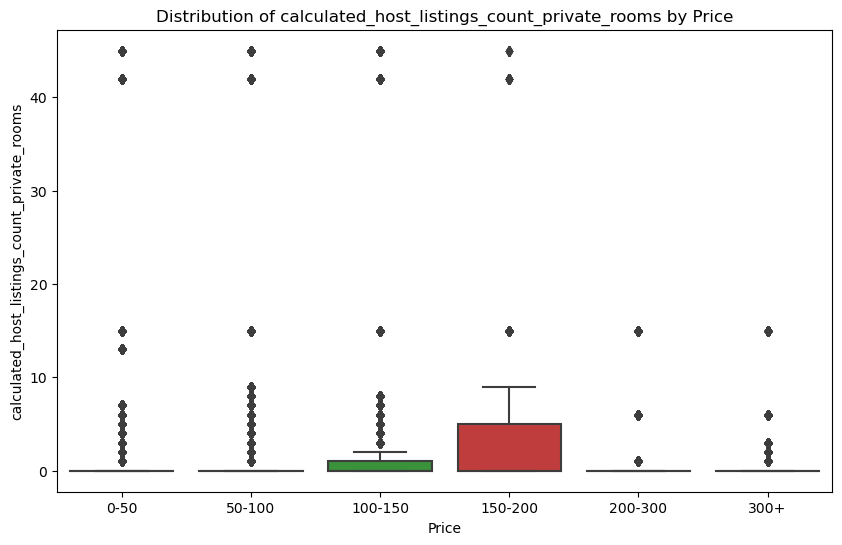

Contingency table for calculated_host_listings_count_private_rooms and price:
 price_category                                  0-50  50-100  100-150  \
calculated_host_listings_count_private_rooms                            
0                                             511945  274665    50821   
1                                              47316   17319     6124   
2                                              13506     730      730   
3                                               6383     960      833   
4                                               5111    2565      720   
5                                               3399    1346      731   
6                                               1460     720     1411   
7                                                730     395      403   
8                                                  0     731     1460   
9                                                  0     365        0   
13                                           

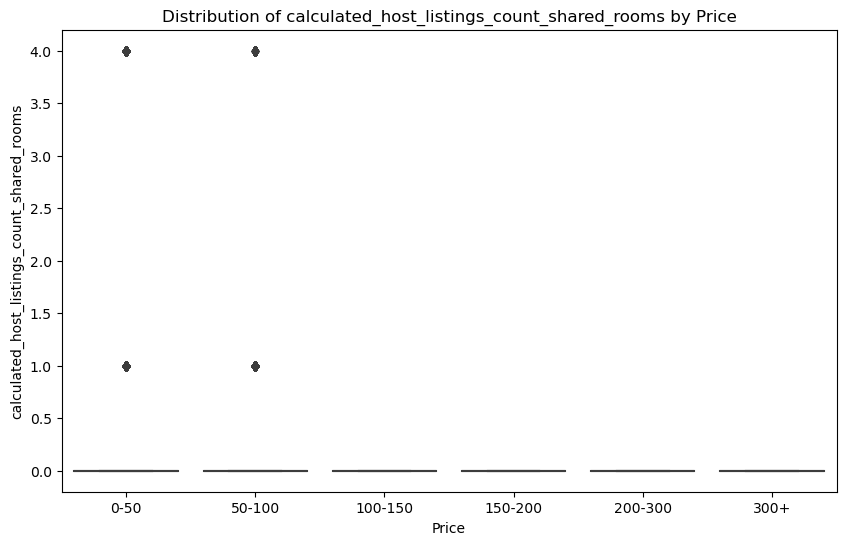

Contingency table for calculated_host_listings_count_shared_rooms and price:
 price_category                                 0-50  50-100  100-150  150-200  \
calculated_host_listings_count_shared_rooms                                     
0                                            598039  307757    69121    31264   
1                                              2555     365        0        0   
4                                               275      90        0        0   

price_category                               200-300   300+  
calculated_host_listings_count_shared_rooms                  
0                                              19111  19998  
1                                                  0      0  
4                                                  0      0  


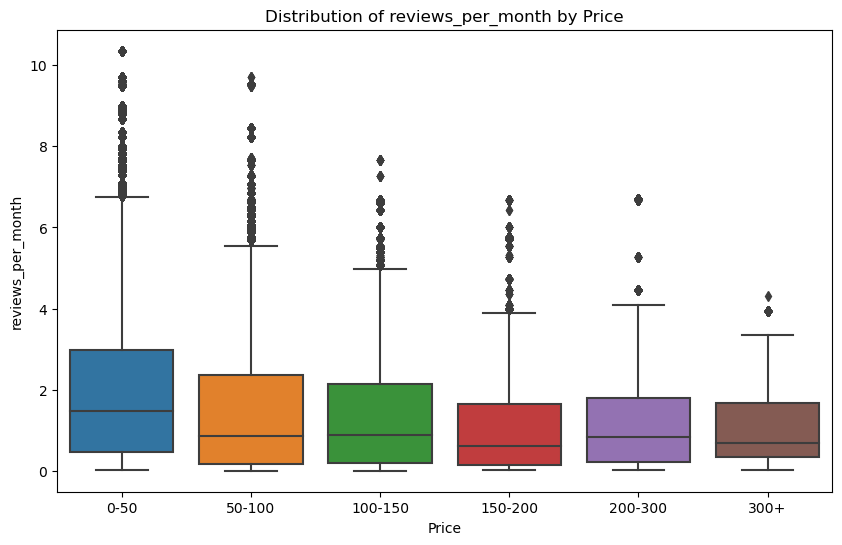

Contingency table for reviews_per_month and price:
 price_category     0-50  50-100  100-150  150-200  200-300  300+
reviews_per_month                                               
0.01                  0     731      730        0        0     0
0.02               9386    4611     1009      746      291   383
0.03               6850    9210     1815      377      365     0
0.04               7005    3392     1130      518        0     0
0.05               5947    5149     3084        0        0    56
...                 ...     ...      ...      ...      ...   ...
9.48                356       9        0        0        0     0
9.54                127     239        0        0        0     0
9.60                365       0        0        0        0     0
9.71                361       4        0        0        0     0
10.35               365       0        0        0        0     0

[594 rows x 6 columns]


In [36]:
###Searching for any continuous features that are related to 'price_category'

merged_df['minimum_nights']= df2['minimum_nights']
merged_df['maximum_nights']= df2['maximum_nights']

target_var=merged_df['price_category']

for column in selected_continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged_df, x=target_var, y=column)
    plt.title(f'Distribution of {column} by Price')
    plt.xlabel('Price')
    plt.ylabel(column)
    plt.show()
    
    contingency_table = pd.crosstab(merged_df[column], merged_df['price_category'])
    print(f"Contingency table for {column} and price:\n", contingency_table)

In [37]:
# wrong values!

zero_listings = (df2['host_listings_count'] == 0).sum()

zero_listings

866

### Preprocessing

In [38]:
# Encode categorical features with onehot

selected_columns= ['host_is_superhost',
                            'host_has_profile_pic', 'host_identity_verified','property_type',
                            'room_type']


for column in selected_columns:
    a = pd.get_dummies(df2[column])
    print(a)

      f  t
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
9450  1  0
9451  1  0
9452  1  0
9453  1  0
9454  0  1

[9455 rows x 2 columns]
      f  t
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
9450  0  1
9451  0  1
9452  0  1
9453  0  1
9454  0  1

[9455 rows x 2 columns]
      f  t
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
9450  0  1
9451  0  1
9452  0  1
9453  1  0
9454  0  1

[9455 rows x 2 columns]
      Boat  Camper/RV  Cave  Cycladic house  Earth house  Entire apartment  \
0        0          0     0               0            0                 1   
1        0          0     0               0            0                 1   
2        0          0     0               0            0                 1   
3        0          0     0               0            0                 1   
4        0          0     0               0            0                 1   
...    ...        ...   ...             ...          ...     

In [39]:
# Encode categorical features with integer labels

from sklearn.preprocessing import LabelEncoder

selected_columns= ['host_response_time']

for column in selected_columns:
    le = LabelEncoder()
    dfle = le.fit_transform(df2[column])
    print(dfle)

[3 3 3 ... 4 4 3]


In [40]:
###Encode all categorical with integer labels

from sklearn.preprocessing import LabelEncoder

encoded_df = df_discrete.copy()

for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    
encoded_df

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text
0,3,1,1,1,6,5,0,8
1,3,1,1,1,6,5,0,2
2,3,1,1,1,6,5,0,2
3,3,1,1,1,6,5,0,2
4,3,1,1,1,6,5,0,2
...,...,...,...,...,...,...,...,...
9450,4,0,1,1,29,5,0,2
9451,4,0,1,1,15,5,0,2
9452,4,0,1,1,25,5,0,2
9453,4,0,1,0,8,5,0,2


### We have presented two ways of encoding categorical data into numerical. In the first, nominal encoding (one-hot), the variable comprises a finite set of discrete values with no relationship between values, whereas in the second, ordinal encoding (LabelEncoder), the variable comprises a finite set of discrete values with a ranked ordering between values.

In [41]:
# Scale selected continuous features as necessary

df2['latitude'].fillna(df2['latitude'].mean(), inplace = True)
df2['longitude'].fillna(df2['longitude'].mean(), inplace = True)

print((df2['latitude']-df2['latitude'].min())/(df2['latitude'].max()-df2['latitude'].min()))
print((df2['longitude']-df2['longitude'].min())/(df2['longitude'].max()-df2['longitude'].min()))

0       1.036043e-06
1       1.046575e-06
2       1.042625e-06
3       1.046575e-06
4       1.052104e-06
            ...     
9450    1.720858e-06
9451    7.669614e-07
9452    8.056649e-07
9453    1.910426e-06
9454    7.156200e-07
Name: latitude, Length: 9455, dtype: float64
0       0.000003
1       0.000003
2       0.000003
3       0.000003
4       0.999579
          ...   
9450    0.000001
9451    0.000001
9452    0.000002
9453    0.000002
9454    0.000002
Name: longitude, Length: 9455, dtype: float64


In [42]:
##Scale all continuous features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_continuous)
scaled_df = pd.DataFrame(scaled_features, columns=df_continuous.columns)

scaled_df

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.371116,0.170806,-0.217244,1.998730,1.097442,1.717232,1.839862,-0.080123,-0.017023,-0.177754,-0.240753,0.241821,0.227536,0.346119,0.444651,0.251059,0.263254,-0.750896,0.510448,-0.126827,-0.218111,-0.084554,-0.811083
1,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.741009,-0.136012,-0.016877,0.055561,0.225133,1.571522,0.360752,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.707335
2,0.371116,0.170806,-0.217244,-0.940457,-0.304141,NaN,-0.741009,-0.136012,-0.016877,0.226659,-0.163105,0.906671,0.227536,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.638169
3,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.095791,-0.136012,-0.016877,-0.224417,-0.240753,0.241821,0.094321,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.839902
4,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.741009,-0.136012,-0.017169,-0.317743,-0.473696,-0.423029,-0.038894,0.346119,0.444651,0.251059,0.263254,-0.750896,-0.780558,-0.126827,-0.218111,-0.084554,-0.845665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450,0.000000,0.000000,-0.331647,1.019001,-0.304141,0.558447,0.549427,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN
9451,0.000000,0.000000,-0.331647,-0.940457,-0.304141,NaN,-0.741009,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN
9452,0.000000,0.000000,-0.331647,0.039272,-0.304141,0.558447,1.194645,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN
9453,0.000000,0.000000,-0.312580,0.039272,-0.304141,-0.600337,-0.095791,-0.136012,-0.017169,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN


In [43]:
# Concatenate scaled numerical features and encoded categorical features

scaled_encoded_df = pd.concat([scaled_df, encoded_df], axis=1)
scaled_encoded_df

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text
0,0.371116,0.170806,-0.217244,1.998730,1.097442,1.717232,1.839862,-0.080123,-0.017023,-0.177754,-0.240753,0.241821,0.227536,0.346119,0.444651,0.251059,0.263254,-0.750896,0.510448,-0.126827,-0.218111,-0.084554,-0.811083,3,1,1,1,6,5,0,8
1,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.741009,-0.136012,-0.016877,0.055561,0.225133,1.571522,0.360752,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.707335,3,1,1,1,6,5,0,2
2,0.371116,0.170806,-0.217244,-0.940457,-0.304141,NaN,-0.741009,-0.136012,-0.016877,0.226659,-0.163105,0.906671,0.227536,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.638169,3,1,1,1,6,5,0,2
3,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.095791,-0.136012,-0.016877,-0.224417,-0.240753,0.241821,0.094321,0.346119,0.444651,0.251059,0.263254,0.528863,0.510448,-0.126827,-0.218111,-0.084554,-0.839902,3,1,1,1,6,5,0,2
4,0.371116,0.170806,-0.217244,0.039272,-0.304141,-0.600337,-0.741009,-0.136012,-0.017169,-0.317743,-0.473696,-0.423029,-0.038894,0.346119,0.444651,0.251059,0.263254,-0.750896,-0.780558,-0.126827,-0.218111,-0.084554,-0.845665,3,1,1,1,6,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450,0.000000,0.000000,-0.331647,1.019001,-0.304141,0.558447,0.549427,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN,4,0,1,1,29,5,0,2
9451,0.000000,0.000000,-0.331647,-0.940457,-0.304141,NaN,-0.741009,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN,4,0,1,1,15,5,0,2
9452,0.000000,0.000000,-0.331647,0.039272,-0.304141,0.558447,1.194645,-0.136012,-0.013911,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN,4,0,1,1,25,5,0,2
9453,0.000000,0.000000,-0.312580,0.039272,-0.304141,-0.600337,-0.095791,-0.136012,-0.017169,-0.582168,-0.551343,-0.423029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437133,-0.218111,-0.084554,NaN,4,0,1,0,8,5,0,2


### We have showcased two ways of scaling: standardization and normalization. Normalization scales each input variable separately to the range 0-1, whereas standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one. Normalization was done manually and standardization through the sci-kit learn library.